# Lending Club Case Study

- Problem statement: Use EDA to understand how <b>consumer attributes</b> and <b>loan attributes</b> influence the tendency of default
- Business objectives: The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 
- Group: Sairam Pillai (Individual)

In [2]:
# All the libraries used for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

### Load and view data

In [102]:
# Load and view the dataset
df = pd.read_csv("loan.csv", low_memory=False)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Understanding individual columns
- Each loan listing has an 'id' which is associated with a member of the platform through 'member_id'.
- Loan related details like loan applied amount, loan funded amount, term, interest rate, monthly installment are provided.
- Loan borrower details like loan application type, employment, annual income, FICO score range (a brand of credit score), last payment date and total last payment etc. are provided.
- The 'loan_status' provides the current status of the loan as 
    - 'Fully Paid' : Borrower has paid off the loan (Non-default)
    - 'Charged Off' : Borrower has become delinquent on payments and loan is marked as not collectable (Default)
- From an initial look at the data, we can see that there is a high count of NaN in some columns.
- We will count and plot the columns with NaNs

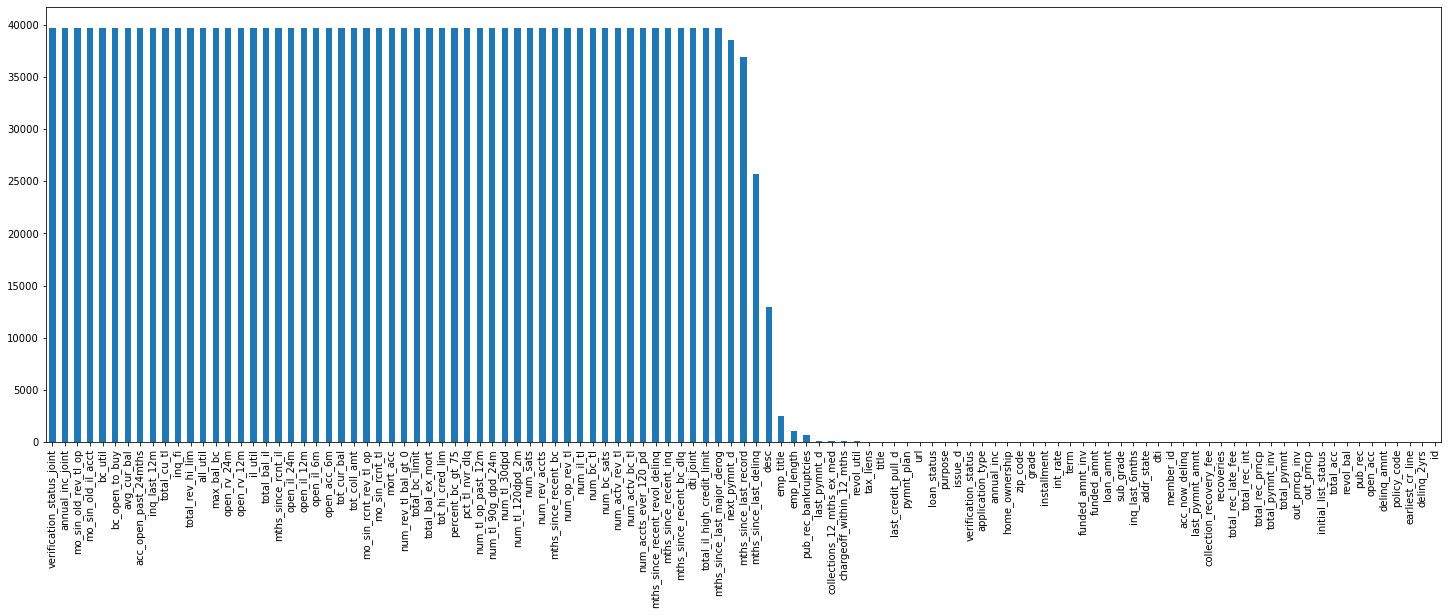

In [4]:
# Counting no. of NaNs in columns
df.isna().sum().sort_values(ascending=False).plot(kind="bar", figsize=(25,8))
plt.show()

- More than 50% of the columns have almost or all values as NaN.
- We should remove these columns as part of Data Cleaning because they will add no value to the analysis.

In [5]:
# Listing all columns and their data type
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

- We see that numeric values like 'int_rate' is treated as object data type, which needs to be fixed.

## Data Cleaning and Manipulation

### Cleaning empty columns
- Drop the columns with NaNs which cannot be imputed effectively (more than 10% data missing)

In [61]:
# Drop the columns where more than 10% of the records are NaNs
na_counts = df.isna().sum()
columns_to_drop = na_counts.loc[na_counts > (len(df) * 0.1)]
print(f"This will result in dropping {len(columns_to_drop)} columns")

This will result in dropping 58 columns


In [62]:
# Drop the identified columns
df = df.drop(columns_to_drop.index, axis=1)

In [33]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


## Coverting data to suitable format
- Change object type data to int or datetime wherever applicable

In [63]:
# Convert interest rate to float from object
df.int_rate = df.int_rate.apply(lambda x: float(x.rstrip('%')))

In [104]:
# Convert date time columns to proper format

def fix_date(date):
    '''Change date format from mmm-yy to mmm-YYYY'''
    print(date)
    if date:
        return date[0:3] + "-" + "20" + date[4:]
    else:
        return None

df.issue_d = df.issue_d.apply(lambda x: fix_date(x))
df.issue_d = pd.DatetimeIndex(df.issue_d).date

Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11

Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Nov-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Nov-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Nov-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Nov-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Nov-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Nov-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Nov-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
Nov-11
Nov-11
Dec-11
Dec-11

Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11
Nov-11

Oct-11
Nov-11
Oct-11
Oct-11
Nov-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Nov-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Nov-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Nov-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Nov-11
Nov-11
Nov-11
Oct-11
Nov-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Nov-11
Nov-11
Nov-11
Nov-11
Oct-11
Oct-11
Oct-11
Oct-11
Nov-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Nov-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Nov-11
Oct-11
Nov-11
Oct-11
Oct-11
Oct-11
Oct-11
Nov-11
Oct-11
Oct-11
Oct-11
Nov-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Nov-11
Oct-11
Oct-11
Oct-11
Nov-11
Oct-11
Oct-11
Oct-11
Nov-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Nov-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11

Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Sep-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Sep-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Sep-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Sep-11
Oct-11
Sep-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Sep-11
Sep-11
Oct-11
Oct-11
Sep-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Sep-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Sep-11
Sep-11
Oct-11
Oct-11
Oct-11
Oct-11
Sep-11
Oct-11
Oct-11
Oct-11
Oct-11
Sep-11
Sep-11
Sep-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Sep-11
Oct-11
Oct-11
Sep-11
Sep-11
Sep-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Oct-11
Sep-11

Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11
Sep-11

Aug-11
Aug-11
Sep-11
Aug-11
Aug-11
Aug-11
Aug-11
Sep-11
Aug-11
Aug-11
Aug-11
Aug-11
Sep-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Sep-11
Aug-11
Aug-11
Sep-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Sep-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Sep-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Sep-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Sep-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11

Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Jul-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Jul-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11
Aug-11

Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11
Jul-11

Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11
Jun-11

May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
Jun-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
Jun-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11
May-11

Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
May-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
May-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
May-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
May-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
May-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11
May-11
Apr-11
Apr-11
Apr-11
Apr-11
Apr-11

Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Apr-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Apr-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11
Mar-11

Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11
Feb-11

Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11
Jan-11

Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10
Dec-10

Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Nov-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Nov-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Nov-10
Nov-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Nov-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Oct-10
Nov-10
Oct-10
Oct-10
Oct-10
Oct-10

Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Oct-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10
Sep-10

Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Sep-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10
Aug-10

Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10
Jul-10

Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
May-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
May-10
Jun-10
Jun-10
Jun-10
Jun-10
May-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
May-10
Jun-10
Jun-10
May-10
May-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
May-10
Jun-10
Jun-10
Jun-10
May-10
May-10
May-10
Jun-10
Jun-10
May-10
Jun-10
May-10
May-10
Jun-10
Jun-10
May-10
May-10
May-10
May-10
May-10
Jun-10
May-10
Jun-10
May-10
Jun-10
May-10
May-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
May-10
May-10
May-10
May-10
Jun-10
Jun-10
May-10
Jun-10
May-10
May-10
Jun-10
Jun-10
May-10
May-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
Jun-10
May-10
May-10
Jun-10
Jun-10
May-10

Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
May-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
May-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
May-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
May-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10
Apr-10

Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Feb-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Feb-10
Feb-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Mar-10
Feb-10
Feb-10

Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Jan-10
Dec-09
Jan-10
Jan-10
Jan-10
Jan-10

Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Oct-09
Nov-09
Nov-09
Nov-09
Oct-09
Nov-09
Nov-09
Nov-09
Nov-09
Oct-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Oct-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Nov-09
Oct-09
Nov-09
Oct-09
Oct-09
Nov-09
Oct-09
Nov-09
Nov-09
Oct-09
Nov-09
Nov-09
Oct-09
Oct-09

Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09
Aug-09

Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Apr-09
Mar-09
Mar-09
Mar-09
Mar-09
Apr-09
Mar-09
Mar-09
Mar-09
Apr-09
Mar-09
Mar-09
Mar-09
Apr-09
Mar-09
Apr-09
Apr-09
Apr-09
Mar-09
Mar-09
Mar-09
Mar-09
Mar-09
Mar-09
Mar-09
Mar-09
Mar-09
Mar-09
Apr-09
Mar-09
Mar-09
Apr-09

Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Oct-08
Nov-08
Oct-08
Nov-08
Oct-08
Nov-08
Nov-08
Nov-08
Nov-08
Oct-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Nov-08
Oct-08
Oct-08
Nov-08
Oct-08
Oct-08
Oct-08
Nov-08
Oct-08
Oct-08
Oct-08
Nov-08
Oct-08
Oct-08
Oct-08
Nov-08
Oct-08
Nov-08
Oct-08
Oct-08
Oct-08
Oct-08
Nov-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08
Oct-08

In [106]:
df[~df.last_pymnt_d.isna()].last_pymnt_d = df[~df.last_pymnt_d.isna()].last_pymnt_d.apply(lambda x: fix_date(x))
df.last_pymnt_d = pd.DatetimeIndex(df.last_pymnt_d).date

df.term = df.term.apply(lambda x: int(x.rstrip("months").strip()))

Jan-15
Apr-13
Jun-14
Jan-15
May-16
Jan-15
May-16
Jan-15
Apr-12
Nov-12
Jun-13
Sep-13
Jul-12
Jan-15
Oct-13
Jan-15
Jan-15
May-13
Feb-15
Jul-12
Aug-15
Sep-13
Jan-15
Oct-13
Oct-12
Sep-12
Dec-12
Apr-13
Dec-14
Jan-15
Aug-13
May-16
Jan-15
Jan-15
Jan-15
Nov-13
Jan-14
Apr-14
May-16
Jan-15
Jan-15
Jan-15
Jan-15
Jul-12
Jan-15
Aug-14
Jan-15
Jul-12
Jan-15
Oct-14
Jan-15
Jan-15
Aug-12
Jul-14
Oct-14
Oct-13
Jul-13
Aug-12
Jan-15
Jan-16
Feb-16
Aug-13
Dec-14
Apr-15
Jan-15
Feb-14
Nov-12
Jun-13
Sep-14
Apr-14
Oct-13
Sep-12
Jan-15
Jan-15
Jun-12
Oct-14
Sep-12
Aug-12
Oct-14
Feb-14
Jul-12
Jan-15
Jan-15
Jan-15
Jul-13
May-16
Dec-12
Nov-13
Apr-14
Sep-12
Feb-13
Dec-14
Oct-12
Jun-13
May-16
Nov-13
Apr-13
Jan-15
May-16
Dec-12
May-16
Jan-15
Jan-15
Jul-13
Sep-14
Jan-15
Jan-15
Jan-15
Dec-14
Jan-15
Jan-15
Mar-13
Mar-13
Jan-15
May-14
Mar-13
May-14
Jan-15
Jan-15
Mar-15
Sep-13
Jan-13
Dec-13
Jun-14
Jan-15
Feb-12
Aug-13
Jan-15
Dec-13
Jan-15
Aug-12
Jun-14
Jan-13
Jan-15
Dec-12
Mar-14
Nov-13
Oct-14
Jan-15
May-14
Jan-15
Apr-12
Sep-13

Sep-12
Mar-13
Dec-14
Dec-13
Jan-12
May-16
Nov-14
Jan-13
Dec-14
Dec-13
Feb-12
Jul-15
May-12
Oct-14
Sep-14
Jul-13
Dec-14
May-15
Nov-14
Dec-14
Dec-12
Oct-14
Nov-15
May-16
Dec-14
Jul-13
Feb-14
May-16
Feb-13
Dec-14
Dec-14
Oct-14
May-16
Dec-14
Dec-14
Jun-12
Jan-13
May-16
Jun-12
Mar-14
Dec-14
Dec-13
Apr-13
May-12
Dec-14
Dec-12
Dec-14
May-14
Sep-14
Dec-14
May-15
Aug-13
Aug-12
Sep-12
May-16
Dec-14
Dec-12
Dec-14
Aug-12
May-14
Dec-14
Dec-14
Dec-12
Aug-12
Nov-13
Dec-14
Jul-13
Dec-14
Nov-12
Jan-15
Apr-13
Jul-15
Jan-13
Dec-14
Nov-12
Oct-14
Dec-14
May-15
Feb-13
Dec-14
Sep-13
Feb-13
Dec-14
Oct-13
Dec-12
Jun-12
Feb-13
Dec-14
May-16
Oct-13
Dec-14
Aug-15
Sep-14
Jan-15
May-14
Dec-14
Jun-14
Dec-14
Dec-12
Aug-12
Jul-14
Jul-15
Dec-14
Dec-14
Dec-14
Aug-12
May-16
Dec-14
May-14
Aug-14
Aug-12
Jan-12
Dec-14
Oct-12
Dec-14
Dec-14
May-13
Dec-14
Dec-14
Dec-15
Mar-12
Jul-13
Oct-13
Sep-12
Mar-14
Feb-14
Dec-14
Jun-14
Dec-14
Dec-14
Dec-14
Jun-12
Oct-14
Jul-12
Nov-15
Aug-13
Nov-13
Mar-16
Aug-13
Aug-13
Aug-12
Apr-16
Nov-14

Jun-14
May-16
Oct-13
Dec-13
Nov-13
Feb-14
Dec-12
Mar-12
Mar-14
Oct-14
May-15
Dec-14
Dec-14
Oct-13
Dec-14
Dec-14
Dec-14
Feb-14
Dec-14
Dec-14
Jan-14
Jun-15
Nov-14
Dec-14
Mar-14
Apr-12
Jan-15
Jan-15
Nov-13
Feb-16
Apr-13
Mar-12
Aug-14
Oct-12
Jun-12
Dec-14
Dec-11
May-16
Sep-13
Dec-11
Dec-14
Apr-13
Jun-12
Jan-13
Aug-12
Mar-13
Oct-12
Mar-13
Apr-14
Dec-14
Feb-14
Oct-12
Nov-14
Jul-12
Sep-13
May-16
Dec-14
Nov-14
May-16
Dec-14
Sep-12
Dec-14
Oct-14
Oct-15
Mar-13
Feb-15
Sep-14
May-12
May-16
May-13
Feb-12
Sep-13
Nov-14
Apr-14
Oct-12
Jan-15
Dec-14
Dec-14
Jan-12
May-16
Jan-15
Apr-13
Sep-13
Apr-13
Dec-14
May-14
Oct-14
Oct-14
May-12
Jan-15
Mar-13
Oct-14
Dec-12
Oct-13
Oct-13
Dec-12
Dec-14
Mar-13
Dec-14
Feb-15
May-16
May-16
Dec-14
Aug-12
Aug-13
Dec-14
Dec-14
Dec-13
May-16
Oct-13
Dec-14
Oct-14
Sep-14
Jun-12
Sep-14
May-16
Jun-14
Jul-13
Nov-13
Nov-15
Dec-14
Feb-12
Dec-14
Dec-14
Jul-14
May-16
May-14
Aug-13
Jan-14
Jan-13
Sep-13
Apr-13
Dec-14
Oct-12
Dec-14
Sep-14
Dec-14
Mar-13
Jan-14
Feb-12
May-16
Aug-12
May-14

Jun-12
Dec-14
Feb-12
Nov-14
Aug-14
Feb-15
Aug-14
Apr-14
May-16
Mar-14
Nov-13
Mar-14
Dec-14
Feb-12
Mar-14
Oct-15
Nov-14
Nov-14
Sep-12
Nov-14
Jan-13
Nov-14
Jan-14
May-13
Jun-15
Nov-14
Jan-16
Sep-12
Nov-14
Apr-14
May-16
Nov-14
Nov-14
Nov-14
Nov-14
Mar-13
Mar-14
Jun-12
Nov-14
May-12
Feb-13
Sep-13
Jun-13
Oct-12
Nov-14
Nov-14
Aug-14
Jul-13
Nov-14
Dec-11
Apr-13
Mar-13
Jun-13
Mar-14
Mar-16
Apr-14
Nov-14
Aug-15
Mar-15
Nov-14
Feb-15
Jan-12
Nov-14
May-14
Nov-13
Dec-12
May-16
Aug-14
Feb-13
Nov-14
Sep-12
Feb-14
Nov-12
Nov-14
Nov-14
Dec-11
Sep-12
May-14
Sep-14
Apr-13
Jul-12
Dec-14
Apr-15
Aug-14
Apr-13
Dec-11
Mar-15
May-15
Nov-14
Jun-13
Aug-14
Nov-14
Jan-14
Jun-14
Nov-14
Jul-14
Feb-14
Nov-14
Jan-13
Mar-14
Sep-13
Oct-13
Mar-12
Dec-14
Oct-14
Nov-14
Oct-15
Feb-14
Feb-14
Aug-13
May-16
Nov-14
May-16
May-16
Sep-14
May-16
Sep-13
Jan-13
Nov-14
Nov-14
Nov-14
Dec-14
May-16
Nov-14
Oct-15
May-14
Nov-14
Aug-14
Nov-14
Jul-15
Mar-12
Apr-14
Sep-12
Apr-14
May-16
Mar-13
Nov-14
Oct-12
May-16
Dec-13
Jul-12
Jan-14
Feb-14

Sep-14
Oct-14
May-16
Oct-15
May-16
Mar-15
Sep-14
May-16
Nov-11
Oct-14
Dec-13
May-16
Dec-12
May-16
Sep-13
Jan-14
May-16
Oct-14
Dec-13
May-16
Oct-14
Oct-14
Apr-14
May-16
Mar-14
Mar-13
Apr-15
Dec-13
Mar-15
Sep-14
Jun-15
Mar-13
Jun-12
May-16
Mar-12
Feb-14
Jun-15
Mar-13
Nov-14
Jan-13
Mar-14
Oct-14
Sep-13
Jun-12
Mar-13
Nov-14
Oct-14
Mar-12
Nov-12
Apr-14
Oct-12
May-15
May-13
Oct-14
May-16
Apr-14
Jan-14
Oct-14
Nov-11
Feb-13
May-16
Mar-14
Sep-12
Nov-13
May-16
Dec-13
Dec-13
May-13
Apr-13
Oct-14
Oct-14
Feb-14
Oct-14
Oct-14
Oct-14
Nov-11
Oct-14
Mar-14
Mar-12
Oct-15
Dec-13
Oct-14
Oct-14
Oct-15
Feb-14
Nov-14
Oct-14
Mar-15
May-12
May-14
Apr-14
Jun-13
Jul-14
Feb-14
Jan-16
Dec-14
Oct-14
May-16
Apr-16
Mar-13
Dec-13
Mar-15
Oct-13
Aug-14
Oct-12
Mar-13
May-12
Sep-12
Nov-14
Sep-14
Oct-14
May-16
Aug-14
Oct-14
Aug-12
Mar-13
Sep-14
Aug-12
Oct-14
May-14
Oct-14
Oct-14
Jul-13
Jan-15
May-16
Oct-14
Dec-12
May-13
Oct-14
Jul-13
Sep-13
Feb-13
Jun-14
Oct-14
May-13
Oct-14
Apr-13
Jan-14
May-12
May-16
Oct-14
Dec-13
Apr-15

Sep-13
Aug-12
Aug-14
Oct-14
Oct-13
May-16
Apr-13
Jan-12
Sep-15
Mar-12
Aug-13
Sep-14
Apr-13
Oct-14
May-16
Sep-15
May-16
Oct-14
Oct-14
Feb-13
Oct-14
Aug-14
Oct-14
Jan-14
Oct-14
May-16
Oct-15
Jan-12
Oct-13
Oct-14
Feb-12
Jun-15
Jun-14
Jan-12
Aug-14
Oct-14
Oct-14
Dec-12
Oct-14
May-16
Oct-12
May-16
Nov-15
Jul-14
Nov-14
Mar-13
Jan-13
Jul-12
Sep-15
Apr-13
Jun-13
Oct-14
Sep-12
Oct-14
May-16
Nov-14
Jul-14
Oct-14
May-16
Nov-11
Oct-14
Jan-14
Oct-14
Oct-14
Oct-14
Jun-14
Oct-14
Oct-13
Feb-13
Jul-14
Nov-12
Aug-13
Mar-14
Dec-13
Oct-14
Oct-12
Oct-14
Oct-14
Feb-12
Apr-14
Jun-14
May-16
May-14
Jan-16
Mar-13
Aug-12
May-12
Nov-12
Jul-13
Oct-14
Jun-12
Nov-13
Dec-12
Jul-12
Oct-14
Apr-14
Apr-12
Aug-14
Dec-14
Oct-12
Feb-14
May-13
Oct-14
Jan-13
Aug-14
Mar-14
May-13
Oct-14
Oct-12
Jul-13
Apr-12
Oct-14
Oct-14
Apr-13
May-16
May-16
Mar-14
Aug-12
Oct-14
Dec-12
Oct-14
Jun-14
Feb-14
May-12
Oct-13
Nov-14
Nov-11
Mar-13
May-14
Jun-14
Jul-12
Oct-14
Feb-14
May-16
Oct-14
Feb-14
Nov-11
Jul-15
Dec-13
Aug-13
Sep-12
Jun-13
Oct-14

May-16
May-12
Oct-13
Mar-12
Feb-12
May-16
Jun-13
Jun-12
Jan-13
Sep-14
May-13
Jan-14
Sep-14
Mar-14
Jun-12
Dec-13
Sep-14
Sep-14
Jul-13
Jun-13
Oct-13
May-16
Oct-11
Apr-12
Jul-13
Oct-14
Sep-14
Nov-12
Dec-13
Feb-12
Oct-11
Sep-14
Sep-14
Feb-15
Apr-12
Sep-14
Mar-12
Mar-12
Jul-14
Nov-12
May-14
Sep-14
Aug-13
Dec-14
Nov-12
May-14
Sep-13
May-16
Aug-13
Nov-12
Sep-14
May-16
Oct-13
Nov-12
Jul-14
Sep-14
Mar-12
Mar-13
Sep-14
Oct-14
Feb-16
Feb-13
Oct-12
Jun-15
Mar-16
Jan-13
Sep-12
Sep-15
Jan-14
Sep-14
May-16
Dec-13
Jan-13
Oct-13
Sep-14
May-14
Feb-12
Sep-14
Apr-14
Feb-12
Dec-12
Oct-13
Mar-12
Feb-16
Apr-14
Aug-13
Apr-14
Sep-14
Jun-15
Sep-13
Apr-14
Apr-12
Sep-14
Apr-15
Feb-13
Apr-15
Nov-13
Jan-13
Oct-12
Nov-12
Sep-14
Jan-12
Mar-14
Apr-12
Sep-14
Mar-14
Oct-11
Feb-14
Sep-14
Sep-14
Jul-13
Nov-12
Sep-13
Sep-14
Jul-14
Sep-14
Aug-13
Feb-16
Aug-14
Aug-12
Sep-14
Jul-14
Feb-14
Apr-12
Nov-11
Sep-13
May-14
Oct-11
Sep-14
May-16
Sep-14
Jul-15
Sep-14
Sep-14
Feb-13
Jul-12
Oct-11
Jul-13
May-14
Nov-11
May-16
May-12
Sep-14

Aug-14
Oct-12
Mar-15
Nov-12
Nov-13
Aug-14
Aug-15
Jul-14
Aug-14
Mar-13
Aug-14
Sep-13
Aug-14
Jan-14
Aug-14
Jun-14
Dec-13
Aug-15
Sep-14
Aug-14
May-16
Aug-14
Mar-14
Aug-14
May-13
Nov-13
Aug-14
Jul-15
Sep-12
Aug-14
Aug-14
Dec-11
Mar-15
Nov-15
Apr-12
Aug-14
Dec-12
Aug-14
Nov-14
Jan-13
May-12
Aug-14
May-14
May-12
Aug-14
Aug-14
Sep-13
Sep-15
Sep-12
May-14
Sep-11
Apr-14
Aug-14
Aug-14
Aug-13
Dec-13
Feb-14
Apr-12
Aug-14
Aug-14
Nov-12
Mar-16
Apr-14
Oct-15
Aug-14
Aug-14
Jan-12
Aug-14
Aug-14
Apr-14
Oct-14
Jul-14
Feb-15
Aug-14
May-16
Dec-12
Feb-13
Oct-11
May-16
Aug-13
May-16
Sep-11
Aug-14
Sep-14
Aug-14
Jan-14
Mar-12
Jul-15
Oct-11
Aug-14
Nov-12
May-15
Sep-12
Aug-14
Jan-13
Apr-12
May-16
Aug-14
Feb-14
Mar-13
May-13
May-16
Apr-14
Mar-12
Nov-13
Oct-12
Aug-14
Jun-14
Sep-13
May-16
Apr-12
Aug-12
Sep-13
Dec-13
Oct-11
Mar-14
Jun-14
Nov-11
Dec-12
Aug-14
May-16
Aug-14
Aug-14
Aug-14
May-16
May-14
Mar-12
May-16
Aug-14
Aug-14
Feb-13
Aug-14
Nov-11
Aug-14
Aug-12
May-16
Aug-14
May-16
Sep-13
Dec-13
Feb-14
May-13
Apr-13

Nov-12
Nov-15
Jan-16
Sep-14
Aug-14
May-16
Aug-14
Aug-14
Feb-14
Aug-14
Apr-12
Oct-15
May-15
Aug-14
Jul-14
Aug-14
Sep-12
Apr-12
Aug-12
Aug-14
Aug-14
Oct-12
Nov-13
Aug-14
Aug-14
Aug-14
Oct-15
Aug-14
Dec-13
Oct-12
Jun-13
Feb-16
Apr-14
Feb-16
Dec-12
Feb-13
Aug-14
Apr-12
Oct-13
Aug-14
Sep-11
Jun-13
Aug-11
May-16
Oct-12
Nov-11
Mar-12
Jun-14
Mar-12
Feb-15
May-16
Mar-13
Jul-12
May-16
Oct-11
Aug-11
Jul-14
Jan-15
Aug-12
Mar-14
Aug-14
Jun-12
Aug-14
Mar-14
Apr-12
Feb-13
Nov-13
Aug-12
Aug-14
Nov-15
May-16
Jul-13
Aug-12
Sep-12
Jun-12
Sep-12
Feb-13
Oct-12
Aug-14
May-13
Aug-14
Mar-12
Aug-14
Jun-13
Aug-14
Aug-14
Jun-12
Nov-13
Aug-13
Aug-14
Aug-14
May-16
Jan-13
Jul-13
Aug-14
Aug-14
Aug-13
Dec-12
Jul-14
May-12
Aug-12
May-16
Mar-15
May-16
Aug-14
Oct-14
Mar-15
Aug-14
Aug-14
Aug-14
Aug-14
Jun-12
Jul-15
May-13
Nov-13
Dec-13
Aug-14
Aug-14
May-13
Jan-15
May-13
Jan-14
May-12
Jul-14
Aug-14
Feb-12
Dec-12
Aug-14
Mar-12
Mar-12
May-12
Aug-14
Apr-13
Oct-11
Oct-11
Sep-13
Aug-14
Jan-14
Aug-14
Mar-14
Feb-15
Aug-14
Mar-14

Jul-14
Jan-16
Nov-11
May-16
Feb-14
Jul-14
Jun-14
Jul-14
Feb-13
Jul-14
Jul-14
Jul-14
May-16
Aug-11
Jul-14
Mar-12
Mar-14
May-14
Nov-13
Jul-14
Jul-14
Sep-11
Mar-14
Sep-13
Sep-12
Dec-13
Jul-14
Jan-13
Aug-15
Jun-12
Feb-12
May-13
Jul-14
Sep-12
Oct-13
Jul-14
Feb-14
Jul-14
Jun-14
Sep-13
Apr-14
Oct-11
Aug-11
Jan-13
Feb-12
Jul-12
May-15
Aug-13
Sep-12
Jul-13
Jul-14
Jan-16
Jan-14
Sep-14
Jul-14
May-16
Oct-11
Dec-13
Jul-14
Jul-14
May-15
Oct-13
Jul-14
May-15
Jul-14
Mar-14
May-13
Feb-14
May-16
Jan-13
May-16
Jul-14
Jan-13
May-12
Jul-14
Jul-14
Apr-12
Dec-12
Sep-11
Jul-14
Jan-14
Jul-14
Aug-11
Aug-12
Aug-13
Feb-14
Nov-11
Jun-12
Jun-14
May-12
Apr-14
Dec-12
Aug-15
Jun-15
Jul-14
May-12
Jan-13
May-12
Jul-14
Jul-14
Jan-12
Feb-12
Aug-11
May-16
Aug-13
Dec-12
Feb-14
May-16
Jul-14
Jul-14
Aug-13
Jul-14
May-16
Oct-14
Jun-14
Jun-13
Aug-13
Aug-13
Jul-14
Nov-13
Jul-14
Jan-13
Jan-15
Dec-12
Aug-11
Oct-14
Aug-14
Jul-14
Jul-14
Aug-14
Feb-14
Jul-12
Dec-13
Nov-12
Mar-14
Jul-14
Feb-13
Sep-11
Feb-13
Sep-12
May-16
Jul-14
Feb-13

Jun-14
Mar-13
Jun-14
Jun-14
Nov-15
Mar-16
Jan-15
Apr-12
Jul-13
Dec-13
Mar-14
Jun-12
Sep-13
Sep-12
May-16
Jun-14
Aug-12
Jun-12
Jun-14
May-16
Jun-14
Mar-12
Jul-14
Jun-14
Jun-13
Apr-13
May-16
Jun-14
Feb-14
Jun-14
Jun-14
Jun-14
May-16
Feb-14
Sep-11
Jul-14
Jun-12
Jun-14
Jun-14
Nov-11
Jul-12
May-15
Mar-12
Oct-14
Jan-16
Jan-13
Sep-12
May-13
Apr-14
Apr-12
Nov-11
Mar-14
Aug-12
Jun-13
Mar-14
Mar-14
Jun-14
Oct-11
Feb-12
Jun-13
Aug-12
Aug-12
Jul-12
Jun-14
Dec-11
Jun-14
Jun-14
Oct-12
Jun-12
Aug-13
Dec-13
Jun-14
Jun-14
Dec-12
Jan-14
Jun-14
Mar-13
Jan-12
Jun-14
Jun-14
Apr-12
Mar-15
Jun-13
Jun-14
Dec-11
Sep-12
Jun-14
Nov-11
Mar-16
Mar-16
Nov-13
Jun-14
Dec-12
Jun-12
Jul-12
Jun-14
Jun-14
Apr-13
Jun-14
Jun-14
Mar-15
Aug-13
May-12
Aug-13
Jun-14
Aug-11
Jun-14
Oct-13
Jul-14
Sep-13
May-14
Nov-11
Mar-15
Jul-11
May-16
Jul-13
Apr-13
Dec-12
Dec-13
Apr-13
Jan-12
Mar-14
Jun-14
Dec-13
Jun-14
May-16
Aug-12
Jan-14
Jun-14
Mar-12
Aug-12
May-16
Nov-11
Sep-13
May-15
Jul-12
May-16
Aug-14
Jul-12
Mar-12
Jun-14
Jun-14
Nov-12

May-14
Feb-12
Aug-13
Jun-11
Apr-14
Feb-15
May-14
Jul-11
May-14
Mar-13
May-16
Aug-12
May-14
Aug-13
Jan-13
Jun-13
Aug-14
Aug-11
May-16
May-16
Jul-13
Aug-14
May-14
Mar-13
Sep-12
Jul-11
May-14
Jan-13
Apr-14
Sep-11
May-16
Jun-13
Mar-15
May-14
Jul-13
Mar-13
Nov-12
Sep-13
Oct-12
May-14
May-14
Jul-12
Jun-11
May-14
Sep-12
Feb-14
Apr-12
Mar-12
Aug-13
Sep-11
May-16
May-16
May-12
Mar-15
Aug-12
Oct-13
May-14
May-16
Feb-13
Jun-14
Apr-14
May-16
Sep-12
May-14
Nov-12
Mar-12
Mar-13
May-13
Jan-12
Jun-15
Dec-11
May-14
Jul-12
May-14
May-14
Feb-14
Mar-12
May-16
May-12
Feb-12
Oct-11
Nov-11
Dec-11
Feb-14
May-14
Dec-11
Aug-13
May-14
Feb-16
May-16
May-14
Mar-16
Sep-13
Mar-13
Dec-13
Oct-12
May-16
Feb-12
Jun-13
Feb-13
Sep-13
Jan-16
May-16
Mar-14
Mar-13
Aug-15
Feb-14
Sep-12
Feb-15
May-14
Feb-14
Nov-12
Sep-13
Jan-12
Sep-13
May-16
May-14
Jan-14
Jun-12
May-14
Feb-14
May-14
Feb-15
May-16
May-14
May-14
Dec-11
Aug-12
Feb-13
May-16
Mar-14
May-16
Apr-13
May-16
May-16
Jul-11
Feb-14
May-14
May-14
Sep-13
Oct-11
May-16
Jun-12

Feb-16
Apr-12
Feb-12
Oct-13
Apr-14
Apr-14
Aug-12
Apr-14
Jul-11
Feb-12
Oct-12
Sep-11
Apr-14
Aug-11
Dec-13
Dec-11
Dec-13
Dec-14
Feb-12
Feb-13
Apr-16
Nov-13
Apr-12
Oct-12
May-16
Oct-13
May-13
Jan-14
Mar-14
Jul-13
Aug-12
Feb-14
Mar-14
Mar-12
Aug-13
Oct-12
May-12
Jan-14
May-15
Apr-14
May-14
Feb-13
Aug-15
Nov-11
Apr-12
Sep-12
Apr-14
Oct-13
Apr-16
May-14
May-13
Apr-14
Apr-16
Apr-14
Mar-14
Apr-16
May-13
Jan-13
Oct-14
Jun-12
Mar-13
Jan-14
Apr-14
Sep-13
Jun-13
May-14
Oct-11
Nov-11
Jan-14
May-12
Apr-14
Jan-12
Dec-13
Jan-12
Oct-12
Apr-14
Oct-11
Mar-13
Nov-13
Feb-14
Apr-14
Apr-14
May-14
Feb-14
Mar-16
Feb-12
Jun-15
May-16
Jun-12
Apr-14
Apr-13
Apr-16
May-15
Mar-14
May-13
Apr-14
Sep-14
Jun-15
Sep-14
Apr-14
Nov-13
Apr-14
Nov-13
Apr-14
Apr-14
Apr-14
Jun-14
Jun-12
Apr-14
Apr-14
Jul-12
Sep-13
May-12
Apr-14
Jul-12
Apr-16
May-14
Jul-13
Aug-12
Feb-15
Oct-11
Apr-14
Oct-11
Nov-12
Oct-15
Oct-11
Apr-14
Jul-13
Apr-14
Jan-12
Apr-14
Apr-14
Apr-14
Nov-12
Nov-11
Nov-13
Apr-14
Apr-14
Oct-13
Apr-16
Nov-13
Apr-13
Jan-14

Mar-14
Oct-12
Feb-12
Jan-16
Apr-14
Sep-15
May-12
Apr-13
Jan-14
Mar-14
Jan-14
Mar-13
Mar-14
Nov-15
Feb-14
Apr-12
Jan-14
Aug-12
Nov-15
Feb-13
Mar-14
Aug-11
Sep-13
Mar-14
Aug-13
Nov-13
Mar-13
Mar-14
Jan-13
Mar-16
May-13
Jun-14
Mar-14
Feb-12
Nov-11
Jun-15
Mar-14
Feb-14
Aug-11
Dec-12
Mar-14
Feb-14
Mar-14
Jun-12
Mar-12
Mar-14
Mar-15
Mar-12
Nov-13
Sep-12
Jul-12
Mar-16
Nov-11
Jan-13
Apr-12
Feb-14
Apr-12
Mar-12
Feb-15
Oct-14
Aug-13
Sep-13
Jun-13
Jul-12
Mar-14
Mar-14
Apr-12
May-12
Oct-14
Mar-14
Mar-13
Oct-15
Apr-14
Jul-14
Mar-14
Mar-14
Apr-14
May-13
Feb-14
Feb-14
Mar-16
Mar-12
Mar-14
Mar-14
Mar-16
Dec-11
Mar-14
Dec-12
Mar-14
Mar-14
Mar-14
Mar-14
Mar-14
Jul-13
Sep-13
Mar-16
Jan-13
Jul-12
Mar-13
Sep-12
Mar-14
Mar-13
Sep-12
Nov-13
Feb-14
Feb-13
Jun-13
Mar-14
Mar-14
Jan-16
Mar-16
Mar-16
Jul-12
Jan-12
Dec-11
Jun-13
Nov-11
Jun-14
Feb-12
Sep-11
May-13
Feb-13
Mar-14
Mar-16
Mar-14
Jan-12
Sep-12
Dec-12
Feb-13
Mar-14
Mar-16
Mar-14
Sep-12
Mar-14
Jul-13
Mar-13
Jan-12
Jun-13
Jan-14
Mar-14
Jan-13
Mar-14
Mar-14

Feb-14
Dec-12
Dec-12
Jan-14
Aug-12
Feb-14
Jul-11
Feb-16
Feb-14
Feb-14
Feb-14
Feb-14
Aug-12
Feb-14
Feb-16
Sep-15
Jul-13
Apr-12
Jul-15
Mar-16
Feb-14
Nov-12
Jan-14
Jul-12
Sep-13
Nov-12
Dec-12
Feb-14
Mar-14
Nov-13
Sep-12
Feb-14
Feb-14
Jun-13
Apr-12
Feb-16
May-13
Jan-13
Jan-12
Jun-12
Sep-11
Feb-14
Feb-14
Jul-12
Jul-13
Feb-14
Feb-14
Oct-12
Feb-13
Feb-14
Feb-14
Jun-12
Sep-12
Dec-13
Jul-13
Feb-16
Feb-14
Feb-16
May-12
May-12
Feb-13
Feb-16
Sep-13
Mar-13
Jan-13
Feb-14
Oct-12
Dec-15
May-15
Jan-14
Feb-14
Feb-14
Aug-13
Jan-14
Apr-12
May-15
Apr-12
Feb-16
Feb-14
Dec-15
Feb-14
Aug-15
Feb-16
Jan-13
Jul-14
Feb-14
Aug-13
Mar-12
Mar-14
Jun-13
Mar-12
Jul-13
Feb-14
Feb-12
Aug-13
May-11
Feb-14
Apr-12
Feb-14
Sep-13
Oct-12
Feb-16
Nov-15
Oct-11
Feb-14
Feb-14
Sep-12
Feb-14
Apr-13
May-15
Jan-15
Feb-14
Nov-13
Mar-13
Feb-16
Nov-11
Dec-13
Jun-12
Nov-15
Dec-13
Feb-14
Feb-14
Feb-14
Aug-13
Jan-13
Feb-14
Apr-13
Nov-14
Sep-13
Jan-13
Jul-13
Oct-14
Nov-13
Jan-12
Apr-13
Feb-14
Mar-13
Jan-14
Nov-12
Feb-14
Feb-16
Feb-14
Jul-13

Jan-14
Mar-13
Jan-14
Jan-14
Jan-14
Feb-15
Jan-14
Jan-14
Jan-14
Jun-12
Jan-14
Jan-14
Oct-12
Oct-15
Jan-14
Jan-14
Nov-13
Jun-11
Jan-14
Nov-11
Jan-14
Jun-14
Jan-14
Jan-14
Dec-15
Jan-14
Jan-14
Nov-12
Jan-14
Sep-11
Dec-15
Dec-15
Jan-13
Aug-13
Oct-14
Dec-13
Jul-13
Jan-14
Oct-11
Nov-12
Jul-13
May-12
Mar-11
Dec-11
Oct-11
May-13
Jan-14
Jan-14
Feb-13
Mar-14
Jul-13
Dec-15
Nov-12
Jan-14
Aug-12
Dec-11
Jan-14
May-13
Jan-14
Jan-14
Sep-12
Jan-14
Jul-12
Jan-14
Jan-14
Jul-13
Oct-11
Oct-13
Apr-12
Jul-11
Oct-12
Mar-13
Jan-14
May-12
Mar-13
Dec-13
Jan-14
Jan-14
Sep-11
Dec-13
Dec-13
Aug-12
Jun-15
Jan-14
Jan-14
Mar-13
Dec-12
Aug-15
Jul-12
Jun-13
Jan-12
Jan-14
Oct-12
Dec-13
Jun-14
Dec-12
Dec-13
Dec-15
Dec-13
Dec-13
May-15
Jul-11
Dec-13
Dec-15
Mar-12
Apr-12
Dec-13
Dec-13
Dec-13
Mar-12
Dec-12
Apr-11
Dec-13
Jan-16
Oct-13
Dec-13
Oct-11
Dec-13
May-13
May-12
Nov-12
Nov-13
Dec-13
Mar-12
Apr-13
Dec-13
Sep-15
Jan-12
Feb-12
Dec-15
Aug-13
Jan-15
Jan-14
Aug-13
Aug-12
Sep-11
Feb-12
Jan-13
Dec-13
Dec-13
Dec-13
Aug-13
Jan-11

Nov-15
Jul-12
Jul-11
Sep-14
Nov-15
Aug-12
Dec-10
Nov-15
Aug-15
Feb-13
Nov-13
Nov-13
Jul-12
Nov-13
Apr-13
Nov-14
Mar-13
Jun-12
Apr-14
Jun-13
Nov-13
Oct-11
Oct-14
Nov-15
May-12
Nov-12
Jul-13
Jun-12
Nov-13
Jul-13
Nov-13
Aug-15
Oct-13
May-11
Nov-13
Feb-15
Nov-13
Oct-13
Nov-15
Dec-12
Jan-12
Oct-12
Nov-15
Apr-12
Sep-15
Jan-12
Apr-14
Jul-13
Apr-15
Aug-12
Nov-15
Feb-14
Nov-13
Nov-14
Oct-13
Nov-13
Nov-13
Sep-13
Nov-13
May-11
Nov-13
Oct-12
Sep-14
Aug-14
Nov-15
Feb-14
Sep-14
Jan-14
Jul-15
Nov-13
Feb-12
Nov-13
Feb-15
Sep-12
Oct-13
Sep-12
Nov-13
Sep-11
Sep-13
Nov-15
Nov-13
Jun-15
Jun-12
Nov-13
Nov-13
Jun-13
Mar-12
Nov-13
Nov-15
Nov-13
Oct-13
Nov-13
Sep-11
Apr-11
Apr-12
Aug-11
Jan-11
Mar-13
Feb-15
Oct-13
Feb-13
Aug-14
Sep-12
Nov-15
Sep-11
Nov-13
Apr-11
Sep-13
Nov-13
Aug-13
Nov-15
Feb-14
Feb-11
Feb-13
Mar-13
Nov-13
Nov-13
Nov-13
Jun-13
Nov-13
Nov-11
Nov-15
Feb-13
Apr-13
Sep-12
Nov-13
Apr-13
Nov-13
Nov-15
Nov-15
Mar-11
Nov-13
Nov-13
Sep-12
Sep-12
Nov-13
Oct-12
Sep-11
Dec-10
Nov-13
Nov-13
Nov-13
Nov-15

Jul-11
Nov-14
Oct-13
Feb-13
Oct-12
Dec-11
May-13
Nov-10
Sep-13
Oct-13
Dec-11
Apr-13
Oct-13
Oct-12
Oct-15
Jul-14
Oct-13
Nov-10
Jan-12
Oct-14
Feb-15
Apr-12
Aug-11
Nov-12
Oct-13
Sep-11
May-14
Sep-12
Jul-13
May-11
Jul-11
Jan-12
Oct-15
Aug-13
Sep-11
Nov-10
Apr-13
Dec-11
May-11
Apr-13
Aug-13
Oct-13
Oct-13
Oct-15
Jan-12
Oct-12
Oct-12
Oct-13
Jan-12
Sep-12
Sep-13
Mar-13
Jul-12
Feb-13
Oct-15
Oct-13
Oct-15
Oct-15
Mar-13
Jan-15
Oct-13
Sep-12
Oct-13
Oct-13
Jun-12
Oct-13
Oct-13
Oct-13
Jul-15
Apr-13
Feb-14
Apr-11
Oct-13
Oct-15
Aug-14
Nov-13
Mar-14
Dec-13
Oct-13
Jun-14
Dec-12
Oct-11
Aug-12
Mar-13
Feb-14
Sep-13
Oct-13
Oct-13
Mar-12
Oct-15
Mar-14
Dec-11
Nov-13
Jan-12
Oct-15
Oct-13
Dec-13
Jun-12
Oct-13
Oct-15
Jun-12
Sep-12
Feb-12
Jul-13
Feb-12
Nov-12
Mar-13
May-12
Jul-12
Nov-12
Oct-11
Jan-12
Oct-15
Mar-13
Oct-13
Nov-12
Aug-14
Oct-13
Feb-13
Sep-11
Oct-13
Sep-13
Oct-13
Oct-13
Oct-15
Nov-13
Oct-13
Sep-12
Jun-11
Nov-13
Jan-13
Mar-12
Oct-13
Feb-13
Oct-13
Feb-13
Oct-12
Oct-13
Oct-13
Oct-15
Nov-15
Oct-13
Jan-13

Sep-13
May-12
Sep-13
Oct-10
Nov-11
Apr-14
Nov-12
Sep-13
Apr-13
Sep-12
Sep-15
Mar-13
Sep-13
Oct-10
Sep-15
Sep-15
Sep-13
Sep-13
Aug-12
Sep-13
Sep-15
Sep-13
Dec-14
Aug-14
May-12
Sep-13
Sep-13
Sep-12
Sep-13
Jan-13
Mar-12
Jan-13
Sep-13
Feb-12
Jul-11
Sep-15
Feb-11
Sep-13
May-11
Jul-11
Sep-15
Sep-15
Apr-12
Mar-12
Sep-13
Nov-11
Jan-13
Jul-12
Jan-14
Jul-15
Sep-13
Aug-12
Jul-15
Jun-15
Jul-11
Sep-11
Jun-14
Sep-15
Mar-15
May-11
Apr-14
Aug-13
Sep-15
Mar-11
May-13
Dec-10
Sep-15
Sep-15
Mar-12
Aug-13
Sep-15
Sep-15
May-11
Sep-15
May-11
Aug-13
Jan-13
Mar-11
Jul-13
Dec-11
Feb-12
Aug-13
Jan-13
Jan-15
Mar-12
Mar-11
Jun-13
Aug-13
Dec-10
Mar-13
Aug-13
Aug-11
Mar-12
Feb-11
Aug-13
Mar-13
Mar-13
Aug-13
Aug-13
Oct-12
Aug-15
Mar-12
Aug-13
Aug-13
Jan-13
Aug-15
Mar-14
Mar-11
Jun-12
Apr-11
Oct-12
Jul-14
Mar-12
Aug-11
Sep-13
Mar-12
Jul-14
Oct-14
Jun-14
Mar-11
Aug-13
Aug-13
Aug-15
Jan-13
Mar-12
Aug-13
Aug-15
May-13
Aug-15
May-13
Oct-13
Dec-12
Aug-13
Dec-13
Aug-13
Apr-12
Apr-11
Aug-13
Apr-11
Aug-13
Jan-12
Jul-13
Apr-15

Jul-13
Jan-12
Jul-13
Jul-13
Jul-13
Mar-13
Sep-14
Jul-13
Mar-13
Jul-13
Feb-11
Mar-12
May-13
Aug-15
Jan-15
Feb-13
Mar-11
Mar-11
Mar-14
Jul-15
Jul-15
Feb-12
Jul-13
Jul-13
Jul-13
Jul-15
Jul-13
Jul-13
Feb-12
Oct-13
Jul-12
Apr-11
Jul-13
May-12
Feb-11
Jul-13
Jul-13
Jul-13
Jul-13
Nov-11
Apr-13
Apr-11
Oct-11
Jul-13
Oct-10
Jul-13
Apr-13
Aug-10
Mar-12
Mar-11
Jul-15
Jul-15
Oct-11
Mar-13
Jul-13
Jul-13
Apr-13
Apr-13
Jul-13
Jan-13
Jul-13
Sep-10
Jul-15
Mar-12
Jul-15
Jul-11
Jul-12
Nov-10
Mar-13
Jan-12
Dec-11
Dec-11
Oct-12
May-13
Jan-13
Dec-11
Jul-13
Jul-13
Jul-13
May-11
Jul-13
Oct-11
Jan-13
Feb-11
Feb-13
Aug-13
Mar-13
Jul-13
Apr-13
Jul-13
Jul-13
Feb-11
Jul-15
Nov-12
Jun-13
May-12
Mar-13
Apr-13
Oct-10
Nov-14
Jun-11
Aug-12
Jul-12
Jul-13
Jul-13
Jan-15
Jul-14
Jun-13
Jul-13
Jul-13
Jul-12
Jul-13
Feb-13
Feb-13
Sep-12
Jul-15
May-12
Jan-13
Jul-15
Jan-15
Jan-13
Jul-13
Apr-12
Jul-15
Mar-11
Apr-13
Jun-12
Jan-11
Jul-13
Mar-13
May-11
Jul-15
Jul-13
Jul-13
Jul-13
Nov-12
Jul-14
Jul-15
Jun-13
May-15
Oct-13
Jul-13
Jul-12

Jun-13
Jun-13
Feb-14
Jun-13
Feb-11
Jun-15
Nov-14
May-11
Jun-13
Feb-13
Mar-13
Sep-12
Jun-15
Jan-12
Jun-13
Aug-12
Mar-13
Jun-13
Jun-15
Apr-13
Apr-13
Apr-15
Jul-12
Nov-14
May-14
Oct-10
Sep-10
Jul-13
Sep-14
Feb-12
Aug-12
Jan-11
Jun-15
Jul-12
Jul-10
Oct-10
Jun-15
Jun-13
Apr-14
May-12
Nov-11
Mar-11
Jun-13
Jun-12
Dec-11
Jun-13
Jun-15
Apr-13
Mar-13
Oct-14
Mar-13
Oct-14
Jan-12
Jan-13
Apr-13
Sep-11
Sep-10
Mar-15
Jun-13
Jun-13
Apr-12
Jun-15
Jun-13
Sep-10
Jul-10
Oct-14
Sep-11
Aug-10
Jun-15
Nov-14
Jun-13
Jun-12
Jun-11
Mar-12
Mar-12
Oct-13
Jun-15
Jul-11
Oct-13
Mar-11
Jun-13
Apr-11
Aug-10
Dec-11
Mar-13
Jun-15
Jun-15
Mar-13
Apr-14
Dec-11
Jun-12
Jun-13
Jun-13
Jun-13
Mar-13
Aug-11
Nov-11
Sep-12
Nov-14
Jun-13
Jun-13
Apr-13
Jan-14
Mar-11
Jun-13
Feb-11
Sep-12
Jul-14
Feb-15
Jun-15
Jul-10
Jul-10
Oct-11
Apr-15
Jun-15
Feb-12
Sep-14
Jul-11
May-11
Dec-10
Feb-13
Apr-14
Oct-12
Feb-13
Dec-12
Feb-13
Jun-13
Oct-12
Feb-13
Jun-13
Jun-13
Feb-12
Jun-13
Feb-13
Feb-15
May-11
Jun-13
Jun-11
Dec-10
Sep-10
May-11
Jun-13
Jun-11

Apr-11
Apr-13
Apr-13
Sep-12
Jun-13
Apr-12
Jul-12
Nov-11
Apr-13
Apr-12
Jun-11
Apr-13
Feb-11
Apr-13
Aug-10
Apr-13
Aug-10
Dec-11
Apr-13
Jan-11
Feb-13
Apr-13
Nov-10
Sep-12
Sep-12
Mar-11
Apr-13
Jul-10
Apr-13
May-10
Apr-13
Feb-12
Jun-11
Aug-12
Sep-12
Feb-13
Apr-13
Mar-13
Jun-12
Apr-13
Sep-12
Jun-12
Jul-12
Feb-12
Apr-13
Dec-12
Feb-12
Oct-12
Aug-11
Feb-12
Feb-12
Apr-13
Apr-13
Oct-10
May-11
Apr-13
Oct-12
Dec-10
Feb-11
May-11
Apr-13
Mar-12
Oct-11
Apr-13
Mar-13
Feb-11
Apr-13
Feb-12
Apr-13
Feb-11
Jan-11
Dec-12
May-11
Apr-13
May-13
Dec-12
Nov-11
Aug-11
Apr-13
Oct-10
Jan-13
Apr-13
Jul-10
Sep-11
Jun-11
Apr-13
Apr-12
Apr-13
Apr-13
Aug-12
Apr-13
Apr-13
Apr-13
Apr-13
Apr-13
Jul-12
Jan-13
May-11
Aug-11
Dec-10
Apr-13
Apr-13
Mar-13
Apr-13
May-10
Apr-12
Nov-11
Feb-13
Apr-13
Apr-13
Nov-10
Jan-13
Aug-12
Apr-13
Apr-13
Nov-11
Apr-13
Apr-13
Dec-10
Feb-12
Feb-13
Apr-13
Aug-12
Feb-11
Feb-11
Apr-13
Sep-10
May-11
Apr-13
Apr-13
Feb-12
Apr-13
Apr-13
Apr-13
Apr-13
Apr-13
Apr-13
Feb-11
Feb-12
Dec-12
Mar-13
Jun-11
Mar-13

Aug-11
Sep-10
Feb-13
May-12
Apr-11
Aug-10
May-12
Feb-13
Feb-13
Feb-12
Sep-12
Feb-13
Aug-11
Oct-10
Dec-11
Feb-13
Nov-11
Feb-13
Feb-13
Feb-13
Feb-13
Dec-12
Jun-12
Feb-13
Feb-13
Feb-13
Mar-13
Feb-13
Jul-10
Feb-13
Aug-12
Feb-13
Feb-13
Feb-13
Feb-13
Sep-10
Jan-12
Feb-13
May-14
Sep-11
Jan-11
Feb-13
Jan-11
Feb-13
Mar-13
Feb-13
Sep-11
Feb-13
Feb-13
Feb-13
May-11
Feb-13
Feb-13
May-11
Feb-12
Feb-13
Dec-12
Sep-12
Apr-10
Jan-11
Feb-13
Nov-10
Feb-13
Feb-13
Feb-13
Mar-11
Aug-12
Oct-11
Dec-11
Oct-10
Jun-10
Jan-12
Apr-12
Feb-13
Mar-11
May-11
Aug-10
Sep-11
Feb-13
Jan-11
Mar-13
Mar-11
Sep-11
Sep-12
Apr-12
Feb-13
Feb-12
Oct-11
Jul-10
Feb-13
Nov-10
Jun-12
Feb-13
Aug-12
Feb-12
Jun-10
Feb-13
Aug-11
Oct-10
Jan-12
Mar-12
Feb-13
Jan-11
Feb-13
Feb-13
Oct-12
Feb-13
Dec-11
Mar-10
Aug-11
May-11
Feb-13
Aug-10
Feb-13
Mar-12
May-12
Mar-13
Feb-13
Apr-12
Feb-13
Sep-12
Mar-12
Apr-12
Oct-12
Dec-11
Mar-13
Feb-13
Feb-13
Feb-13
Feb-13
Feb-13
Apr-12
Apr-12
Aug-10
Feb-13
Dec-10
Feb-13
Mar-13
Feb-13
Feb-13
Dec-10
Mar-10
Jul-11

Dec-12
Mar-10
Feb-12
Oct-10
Nov-12
Sep-10
May-11
Aug-11
Dec-12
Dec-12
Dec-12
Apr-11
Dec-12
Dec-12
Dec-11
Dec-10
Dec-12
Feb-11
Jan-10
Dec-12
Feb-11
Dec-12
Apr-10
Dec-12
Dec-12
Jul-11
Mar-11
Dec-12
Nov-11
Jul-11
May-12
Dec-10
Dec-12
May-12
Dec-12
Dec-12
Apr-11
Jul-12
Dec-12
Dec-12
Dec-12
Dec-12
Oct-10
Sep-10
Oct-11
Oct-10
May-11
Dec-12
Jul-10
Dec-12
Aug-12
Apr-10
Nov-12
Dec-12
Sep-12
Aug-11
Aug-11
Dec-12
May-10
Dec-12
Dec-12
Nov-10
Sep-11
Aug-12
Dec-11
Feb-11
Jul-11
Dec-12
Feb-12
Mar-11
Dec-12
Dec-12
Dec-12
Jan-12
Feb-12
Mar-12
Nov-11
May-12
Nov-12
Feb-11
Jan-13
Oct-11
Nov-12
Nov-11
Mar-12
Aug-11
Feb-11
Jul-12
Jun-10
Nov-12
Nov-12
Sep-10
Aug-11
Jun-11
Nov-12
Apr-11
Mar-12
Mar-12
Dec-12
Dec-12
Jun-11
Nov-12
Nov-12
Aug-11
Mar-11
Nov-12
Mar-11
Nov-12
Mar-12
Jul-10
Dec-09
Apr-12
May-11
Jul-10
Nov-12
Mar-12
Dec-12
Dec-12
Feb-10
Nov-11
Dec-10
Dec-09
Dec-12
Apr-12
Nov-12
Nov-12
Feb-12
Aug-12
Apr-11
Nov-12
Nov-12
Nov-12
Jun-12
Mar-12
Nov-12
Nov-12
Nov-12
Jun-12
Sep-12
Nov-12
Jul-11
Apr-12
Oct-12

Sep-12
Jun-11
Oct-09
Feb-10
Sep-12
Sep-12
Sep-12
Feb-10
Jan-11
May-12
May-10
Sep-12
Sep-12
Mar-10
Sep-12
Mar-11
Mar-12
Jul-11
Sep-12
Sep-12
Jun-12
Sep-12
Sep-12
Apr-12
Feb-11
Sep-12
Apr-10
Nov-09
Sep-12
Sep-12
Sep-12
Sep-12
Sep-12
Aug-12
Aug-12
Aug-12
Sep-12
Sep-12
Sep-10
Apr-12
Sep-12
Oct-11
Feb-12
Aug-12
Sep-12
Dec-10
Sep-12
Sep-12
Feb-10
Mar-11
Sep-12
Apr-10
Sep-12
Nov-10
Sep-12
Jan-11
Sep-12
Aug-12
Sep-12
Sep-12
Jan-12
Dec-10
Jan-11
Sep-12
Jan-10
Aug-12
Sep-12
Sep-12
Oct-09
May-10
Sep-12
Sep-12
Sep-12
Sep-12
Mar-11
Sep-12
Sep-12
Sep-11
May-11
Aug-12
Nov-13
Sep-12
Sep-12
Sep-12
Aug-12
Aug-12
Oct-10
Mar-12
Aug-12
Mar-12
Aug-12
Feb-12
Aug-10
Aug-12
Sep-10
Mar-11
Aug-12
Aug-12
Aug-12
Mar-11
Aug-12
Feb-11
Dec-10
Aug-12
Aug-11
Mar-11
Dec-09
Mar-12
Dec-11
Mar-10
Dec-10
Aug-11
Aug-12
Sep-12
Mar-12
Oct-09
Aug-12
Jun-11
Jul-10
Mar-12
Jul-11
Jan-12
Aug-12
Oct-10
Jul-12
Oct-09
Jan-11
Sep-12
Dec-09
Aug-12
Jun-11
Sep-12
Sep-12
Sep-12
Jun-12
May-12
Oct-11
Jan-12
Mar-12
Jul-10
Jan-10
Mar-12
Dec-11

May-12
Mar-12
Dec-11
Aug-10
Oct-11
May-12
May-12
Jan-10
Jan-11
Feb-11
May-10
May-12
Jan-11
May-12
Feb-12
Dec-10
May-12
May-12
Sep-09
Feb-11
Aug-10
May-12
Mar-12
Jun-10
Jan-12
Mar-11
Jan-11
Oct-10
May-12
Jun-12
May-12
May-12
Jun-12
May-12
Oct-10
Feb-12
Nov-10
May-12
Feb-12
Mar-12
Dec-10
Apr-11
Jan-10
May-12
Dec-11
Jun-10
May-12
Jul-12
Mar-11
Mar-12
Oct-10
May-11
May-11
May-12
May-10
Jun-10
Apr-12
May-12
Jan-11
Mar-11
May-12
May-12
May-12
Jul-09
Nov-10
Jun-10
May-12
Nov-09
May-12
Jun-12
Dec-09
Aug-10
Jul-11
May-12
May-12
May-12
May-12
Aug-10
Aug-11
May-12
Jun-12
Oct-10
May-12
Jan-12
Apr-11
Apr-11
May-12
Jun-11
May-12
May-12
Mar-10
Jun-11
Apr-11
Aug-11
Jun-09
Jun-12
Jul-10
Dec-09
May-12
May-12
May-12
May-12
Jan-10
Feb-11
Dec-10
May-12
Dec-10
May-12
May-12
May-12
Sep-10
Feb-11
May-12
May-12
Mar-10
May-12
May-12
Jun-10
Jan-10
May-12
May-12
Mar-12
May-12
Oct-11
Mar-11
Oct-11
Feb-12
May-12
Jul-10
May-12
May-12
Jan-11
Feb-12
May-12
Mar-12
May-12
Dec-11
Aug-09
May-12
May-12
May-12
Oct-09
Mar-10

Sep-11
Jan-12
Feb-12
Oct-09
Apr-09
Feb-11
Aug-11
Jan-12
Jan-12
Jan-12
Jul-09
Aug-11
Dec-10
Jul-11
Oct-09
Jan-12
Oct-10
Jan-12
May-12
Jun-09
Jan-12
Aug-09
Jul-09
Jan-12
Sep-11
Feb-11
Jan-12
Apr-11
May-11
Sep-09
May-10
Feb-12
Jul-09
Oct-10
Mar-11
Jan-12
Oct-10
Jan-12
Apr-11
Jan-12
Aug-09
Mar-10
Jan-12
Apr-11
Jan-12
Jan-12
Dec-10
Jan-12
Dec-11
Jan-12
Feb-10
May-09
May-10
Mar-11
Sep-11
Apr-11
Mar-11
Jan-12
Aug-11
Nov-10
Jan-12
Aug-10
Jan-12
Mar-11
Mar-09
Jan-12
Apr-11
Feb-12
Mar-10
Jul-10
Aug-11
Jan-12
Feb-11
Sep-10
Jan-12
May-10
Dec-11
Sep-11
Feb-10
Dec-11
May-09
Feb-12
Dec-09
Jan-12
Jan-12
Jul-11
Feb-10
Jan-12
Jan-09
Jan-12
Dec-11
Aug-10
Jan-12
Jan-12
Mar-09
Mar-10
Dec-11
Jan-12
Jan-12
Feb-09
Feb-10
Dec-11
Nov-11
Sep-11
Dec-11
Jan-12
Mar-10
Aug-10
Sep-10
Dec-11
Dec-11
Dec-11
Jan-10
Dec-11
Jun-09
Dec-09
Jun-09
Jun-09
Dec-11
Oct-11
Jan-12
Dec-11
Aug-09
Dec-09
Dec-11
Dec-11
Jul-10
Oct-11
Oct-10
May-10
May-09
Dec-11
May-09
Dec-11
Mar-11
Dec-10
May-10
Dec-11
Oct-10
Dec-11
Nov-10
Dec-11
Aug-09

Aug-09
Feb-11
Feb-11
Sep-08
Feb-11
Nov-09
Feb-11
Apr-09
Feb-11
Feb-11
Sep-10
Jan-11
Feb-11
Feb-10
Sep-10
Sep-10
May-08
Feb-11
Feb-11
Mar-11
Mar-11
Feb-11
Feb-11
Feb-11
Sep-09
Feb-11
Feb-11
Nov-08
Sep-10
Feb-11
Feb-11
Nov-09
Feb-11
Feb-09
Mar-09
Feb-09
Dec-09
Feb-11
Nov-09
Sep-09
May-10
Mar-11
Dec-09
Aug-10
Jan-11
Mar-11
Feb-11
Mar-10
Feb-09
Feb-11
Jan-09
Feb-11
Feb-11
Mar-11
Nov-08
Feb-11
Jun-10
Feb-11
Feb-11
Jun-10
Sep-10
Feb-11
Nov-09
Jan-11
Feb-11
Sep-09
Feb-11
Mar-09
Oct-08
Jan-11
Mar-10
Aug-11
Dec-10
Nov-09
Jan-11
Jan-11
Jul-08
Sep-10
Feb-11
Feb-11
Feb-11
Jul-10
Feb-11
Feb-11
May-08
Dec-10
Feb-11
May-10
Feb-11
Feb-11
May-09
Dec-08
Sep-11
Feb-11
Jan-09
Feb-11
Jun-09
Feb-11
Aug-10
Aug-10
Feb-11
Feb-11
Oct-10
Aug-10
Feb-11
Jul-08
Jul-10
Dec-10
Sep-10
Feb-11
Apr-09
Feb-11
Feb-11
Feb-11
Oct-11
Sep-09
Jan-09
Oct-12
Jul-09
Sep-10
Feb-11
Mar-10
Feb-10
Oct-08
Mar-11
Jan-11
Dec-10
Nov-09
Mar-10
Aug-08
Dec-08
Jan-11
Jan-11
Jan-11
Jan-11
Sep-10
Oct-09
Jan-11
Nov-08
Jan-11
Jan-11
Jan-11
Oct-08

C:\Users\saira\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-15 00:00:00

In [105]:
df.last_credit_pull_d = df.last_credit_pull_d.apply(lambda x: fix_date(x))

May-16
Sep-13
May-16
Apr-16
May-16
Jan-16
May-16
Dec-14
Aug-12
Mar-13
Dec-15
Aug-13
Nov-12
May-16
Mar-14
May-16
Apr-15
May-14
Jul-15
Feb-16
Mar-16
May-16
May-16
Mar-14
Mar-13
Sep-12
May-16
May-13
May-16
Jan-15
Dec-14
Feb-16
Apr-16
May-16
Dec-14
May-16
Jan-16
May-16
May-16
May-16
Dec-14
May-16
May-16
Dec-15
Jun-12
Apr-16
Dec-14
Apr-16
Apr-16
Apr-16
Mar-15
May-16
Dec-14
Dec-12
Mar-16
May-16
May-16
Mar-15
Sep-14
May-16
Jan-16
Jan-16
Feb-14
May-16
Jun-15
Dec-14
May-16
Jul-15
Oct-13
May-16
Apr-14
May-16
May-16
Dec-14
Dec-14
May-16
Oct-14
Apr-16
Mar-14
Oct-14
Feb-14
Feb-13
Dec-14
Dec-14
Nov-15
Jul-14
May-16
Dec-12
Sep-15
May-16
Apr-16
Feb-13
May-16
Oct-12
May-16
May-16
Nov-13
Dec-15
Dec-14
May-16
May-13
May-16
May-16
May-16
May-16
May-16
Dec-14
May-16
Dec-14
Nov-14
Dec-14
May-16
May-16
Jun-15
Jan-15
Apr-14
Mar-13
Apr-16
Jan-15
Jan-15
Jul-15
Nov-13
Mar-15
May-16
Sep-14
May-16
Feb-12
Feb-16
Mar-16
Nov-13
Jan-15
May-16
Oct-15
May-16
May-16
May-16
Mar-14
Mar-14
Sep-14
Jan-15
May-16
Jun-15
Apr-12

Nov-13
May-16
Dec-13
Jul-15
Apr-13
Jan-15
Sep-13
Jul-15
Feb-15
Sep-15
Apr-13
May-16
Dec-14
Dec-15
May-16
Apr-15
Oct-13
May-16
Jan-16
Nov-13
May-13
Jul-12
Mar-13
May-16
May-16
Nov-13
Dec-14
Mar-16
May-16
Oct-15
Apr-16
Dec-14
Dec-15
Dec-14
Apr-16
Feb-13
May-16
May-16
Dec-14
Dec-14
Dec-14
Mar-16
May-16
Dec-14
Oct-14
Aug-14
Feb-13
Jan-12
Aug-15
May-16
Dec-14
Jan-16
Oct-13
May-16
Dec-14
May-16
Mar-16
Jul-13
Oct-13
Sep-12
May-16
Sep-14
May-16
Jun-14
Apr-15
Feb-15
Dec-14
Nov-12
Oct-14
Nov-12
May-16
May-16
Nov-13
Feb-16
Jan-14
Aug-13
Feb-13
May-16
Apr-16
May-16
Dec-14
May-16
Jul-15
Feb-16
Feb-16
Aug-12
Apr-14
May-16
May-16
May-16
May-16
May-16
Sep-15
May-16
May-16
Dec-14
May-16
May-16
May-16
May-16
Apr-16
Apr-15
May-16
Dec-14
Apr-14
Nov-14
Jan-16
Feb-15
Dec-14
May-16
Feb-16
Dec-14
Apr-12
May-16
May-16
Jan-16
Feb-16
Apr-14
May-16
May-16
May-16
Feb-16
May-16
Dec-14
Apr-16
Feb-13
Apr-14
Jul-13
Apr-16
May-16
May-16
Aug-14
Apr-16
Feb-16
Dec-15
Dec-14
Feb-16
Jun-13
Sep-15
May-16
Nov-13
Apr-15
Apr-16

May-16
May-16
May-16
Feb-13
Apr-14
Jul-15
May-16
Feb-13
May-16
May-16
May-16
Aug-14
Apr-16
Dec-12
Oct-14
Dec-14
Sep-15
May-16
Dec-14
May-16
May-16
Dec-14
Jun-14
Oct-14
May-16
Dec-14
May-16
Jun-15
Jul-15
Apr-16
Dec-11
May-16
Jul-15
May-16
May-16
Jan-15
Jul-15
May-13
May-16
Dec-15
Dec-14
Sep-13
May-13
Nov-13
May-16
May-16
Dec-14
Dec-15
Apr-16
Mar-16
Apr-13
Dec-14
May-16
May-16
Mar-13
May-16
Feb-16
May-16
Jul-15
Apr-16
Feb-16
May-16
May-16
May-16
Aug-12
Dec-14
May-16
Jun-13
May-16
May-16
May-16
Apr-14
May-16
May-16
Mar-15
Apr-16
Mar-12
May-14
Feb-14
Oct-13
Dec-14
May-16
May-16
Feb-16
Sep-13
May-16
Aug-12
Jul-13
Aug-14
Dec-14
May-16
Mar-15
May-16
Jan-15
Dec-15
Dec-15
Aug-14
May-16
May-16
Dec-15
May-16
Mar-13
Mar-16
Feb-12
May-16
Sep-14
May-16
May-16
May-16
May-16
Jan-14
Nov-15
Jul-14
May-16
May-16
May-14
Dec-14
Mar-14
May-14
May-16
Dec-14
Jan-15
May-15
Nov-12
Jan-16
May-16
Dec-15
May-16
May-16
Oct-12
Feb-15
May-16
Sep-12
Nov-13
Nov-15
May-16
Feb-13
May-16
Feb-15
Nov-14
Nov-14
Jun-14
Apr-16

Apr-14
May-13
May-16
Apr-16
Feb-13
Nov-14
May-16
Feb-14
Apr-15
Apr-16
Jul-15
Feb-12
Jan-15
May-16
Dec-15
Jul-13
Mar-16
Dec-15
Sep-15
May-16
Jul-14
Nov-15
Feb-16
May-16
Feb-16
Jan-16
Jan-15
Jul-15
Jun-14
Jun-14
May-16
Jul-14
Feb-14
Nov-14
Jun-13
May-16
Sep-13
Dec-15
Mar-12
May-16
May-16
May-16
Oct-15
Feb-14
Feb-14
Nov-15
Apr-16
Nov-14
May-16
May-16
Sep-14
May-16
Jan-14
May-13
Sep-15
Nov-14
May-15
Oct-15
May-16
Nov-14
Oct-15
May-14
May-16
May-16
Nov-14
Apr-16
Mar-12
May-14
Feb-16
May-16
May-16
May-16
May-16
Oct-12
May-16
May-16
Jul-12
Jun-14
Apr-16
Apr-16
Oct-15
Apr-16
Feb-12
Nov-14
May-16
May-16
Jun-15
Nov-14
Sep-15
Aug-13
May-16
Feb-14
May-16
Oct-14
May-15
Dec-15
May-12
May-16
Feb-13
May-13
Dec-13
Apr-16
Feb-14
Feb-15
Feb-14
Sep-15
Dec-15
Apr-16
May-16
Nov-14
Nov-14
Feb-12
May-16
May-16
May-16
Apr-14
Jun-14
Jul-15
Apr-15
Feb-16
Oct-13
May-16
Nov-15
May-16
May-16
Jul-14
Dec-14
Jul-13
Nov-14
Jul-14
Nov-14
May-16
Jul-14
Jul-15
Jul-13
May-16
Feb-14
May-16
Nov-14
May-16
Nov-14
Jul-15
Nov-14

Jul-13
Feb-15
May-16
Oct-14
May-16
Sep-13
Oct-14
Aug-13
Oct-13
May-16
Oct-14
Apr-16
Oct-11
Oct-14
Jun-13
Oct-14
May-16
Apr-16
Jan-16
May-16
May-15
Oct-15
Oct-14
May-15
Mar-16
Jan-14
Mar-14
May-16
May-16
Apr-16
May-16
May-13
May-16
Mar-15
Jul-15
Feb-13
May-16
May-16
Oct-14
May-16
May-16
Mar-16
May-16
Oct-14
Oct-14
Nov-15
Apr-16
Apr-14
May-16
Nov-12
Apr-15
Dec-12
Oct-14
May-16
May-15
May-16
Sep-13
May-16
Nov-15
Oct-14
Dec-14
Dec-13
Feb-13
Jul-15
May-14
Apr-16
May-16
Sep-12
Jul-15
May-16
May-16
Mar-13
Apr-12
Feb-16
May-16
Feb-16
Nov-15
May-16
Dec-15
Jul-15
May-16
Jul-14
May-16
Jul-13
Jul-13
Jan-14
Apr-14
May-16
Oct-15
May-16
Apr-16
May-16
Apr-16
Apr-16
Oct-13
May-16
May-16
May-16
Oct-14
May-15
Apr-13
Nov-14
Feb-12
Sep-14
Oct-14
Oct-14
Apr-16
Mar-16
Apr-16
Jun-14
Oct-14
Sep-15
May-16
May-16
Feb-13
Jun-13
Mar-13
Apr-16
Feb-14
May-16
Jul-14
Feb-14
May-16
Apr-15
Apr-16
Aug-14
May-16
Mar-12
Oct-14
Apr-16
May-16
Sep-12
May-16
Mar-14
Oct-14
May-16
Jan-14
Jan-15
May-16
Jan-12
May-16
Apr-16
May-16

May-16
Nov-12
Jun-14
Apr-16
May-16
Mar-16
Nov-13
Jul-12
May-16
Mar-16
Sep-14
Oct-15
Sep-14
Apr-16
Apr-16
Nov-12
Jan-12
Feb-16
May-16
May-16
May-16
Nov-13
Apr-16
May-16
Dec-14
Apr-14
Sep-14
May-16
May-16
Jun-15
May-16
Mar-15
Apr-16
Sep-14
Mar-15
Aug-14
May-16
May-16
Aug-14
Oct-15
May-16
Mar-13
Oct-14
Mar-16
Jan-15
May-16
Sep-14
Mar-16
Apr-13
Feb-13
May-16
Feb-16
Sep-14
Sep-14
Sep-14
May-16
Apr-16
Oct-13
May-16
Jul-15
Feb-13
Mar-13
Oct-14
Apr-16
Apr-16
May-14
May-15
Sep-14
May-16
May-16
Jan-16
Jul-15
May-16
Jul-13
Apr-13
Apr-16
Feb-16
May-16
Sep-14
Sep-14
May-16
May-16
May-16
Nov-12
May-16
Jan-16
Jun-12
Feb-16
Sep-14
Jan-14
Sep-14
Oct-13
Apr-13
Jan-16
Jul-14
Oct-14
Feb-16
Oct-13
Sep-13
Sep-13
May-16
Sep-12
Jul-15
May-16
Nov-12
May-16
May-16
Mar-14
May-16
May-16
Mar-16
May-16
Mar-14
May-16
May-16
May-16
Sep-15
May-16
May-16
Mar-16
Aug-14
May-16
Oct-14
May-16
Feb-14
May-16
Dec-13
Mar-12
Feb-14
May-16
May-16
Nov-15
May-16
Oct-14
Jul-12
May-16
May-16
Oct-13
Feb-14
Oct-14
Dec-12
Feb-13
Dec-14

Feb-14
Sep-14
May-12
May-16
May-16
May-16
Sep-14
May-16
Apr-16
Apr-16
May-13
Oct-14
Dec-14
May-16
Aug-12
May-16
Mar-14
Sep-14
Jan-16
Feb-12
Jul-12
Jan-15
May-16
Nov-14
May-16
May-16
Sep-14
May-15
Apr-16
Oct-14
May-16
Nov-14
May-16
May-16
May-16
Aug-12
Dec-15
May-16
Dec-12
Aug-14
Feb-15
Feb-15
Oct-14
Aug-12
May-16
Oct-13
May-16
May-16
Apr-16
May-16
Sep-14
May-16
May-16
Sep-15
Dec-13
Sep-14
Aug-15
Jun-12
May-16
Jan-16
Sep-14
May-16
Oct-14
May-16
May-16
Feb-13
May-16
May-16
Feb-16
Apr-14
May-16
Sep-14
Mar-16
May-16
May-14
Jun-13
May-16
May-16
Apr-16
Sep-14
Oct-12
May-16
Feb-14
Nov-15
May-16
May-16
Sep-14
Apr-13
Jan-15
May-16
May-16
May-16
Jan-16
May-16
Mar-13
May-16
Nov-15
Sep-13
May-16
May-16
Nov-13
Apr-16
Feb-14
Mar-15
Dec-12
Feb-13
Jun-12
Mar-16
Jun-13
Apr-15
Apr-16
May-16
May-16
Sep-14
May-16
Sep-14
May-15
Jul-13
Apr-16
Apr-15
Sep-14
Sep-14
Jul-13
Aug-13
Dec-15
May-13
May-16
Jul-13
May-16
May-16
May-16
Jan-16
Apr-16
May-16
Sep-14
Dec-15
Apr-16
Feb-14
May-16
May-16
May-16
Oct-15
Oct-15

May-16
Apr-16
May-16
Aug-14
May-16
Apr-14
Jun-14
May-16
May-16
May-16
May-16
May-16
Aug-14
Jun-15
Oct-15
Sep-13
May-16
May-16
Mar-16
Aug-14
May-16
Dec-14
May-16
Apr-16
Jun-13
Nov-15
Nov-14
May-16
May-13
Mar-14
May-16
May-16
May-16
Aug-14
Aug-14
May-16
May-16
May-16
May-16
Sep-14
May-16
Jul-15
May-16
May-16
Apr-12
Dec-14
Jan-14
Oct-13
Apr-14
Feb-13
May-16
Aug-14
Sep-14
May-16
May-16
Feb-16
Apr-16
May-16
Aug-14
Apr-16
Aug-14
Nov-13
Feb-13
Nov-13
Aug-14
May-16
May-16
May-16
Apr-16
May-16
May-16
Apr-16
Apr-14
Nov-13
Aug-14
May-16
Mar-16
Aug-12
May-16
Aug-15
Mar-15
Mar-16
Feb-14
Dec-12
May-16
Nov-12
Apr-16
May-16
Apr-14
May-16
May-16
Aug-14
May-16
May-16
Aug-14
Mar-14
May-16
Oct-14
Aug-14
Feb-14
Nov-12
Aug-14
Aug-14
May-16
Mar-16
Nov-15
Aug-14
May-16
May-16
May-16
May-16
Oct-15
May-16
May-16
Jun-15
May-16
Apr-16
Jun-12
Aug-14
Apr-14
May-16
Mar-16
May-16
Aug-13
Dec-13
Aug-14
Aug-14
Aug-14
Mar-16
May-16
May-16
Feb-15
May-16
Aug-14
Mar-15
May-16
Jul-13
Apr-12
Apr-16
May-16
Nov-13
Jun-15
Nov-14

Jan-12
Aug-14
Mar-12
May-16
May-16
Dec-14
May-16
May-16
May-16
Jan-14
May-16
May-16
Apr-16
Apr-14
May-16
Jan-16
Apr-14
Apr-16
Jun-13
Mar-15
May-16
May-14
May-16
Jun-12
May-16
May-15
Sep-15
May-16
Apr-16
Aug-14
Sep-11
Aug-13
Apr-13
Apr-16
May-16
May-16
Aug-11
May-16
Nov-15
Sep-15
Feb-13
May-16
Feb-14
Aug-11
May-16
May-16
Apr-16
Aug-14
Sep-15
Apr-14
May-16
May-16
May-16
Dec-13
May-16
Jan-16
May-16
Nov-13
May-16
Nov-13
Jan-12
Jan-14
May-16
Apr-14
May-16
May-16
May-16
Feb-14
May-16
Feb-14
Jul-12
May-16
May-16
Feb-13
May-16
Feb-16
May-16
Feb-14
Aug-14
May-16
Aug-14
May-16
May-16
May-16
Dec-13
Apr-16
Jul-15
Feb-12
Jan-15
Aug-14
Mar-15
Feb-15
Jan-16
Jan-14
Feb-12
Mar-14
Apr-16
May-16
Jul-14
May-14
Aug-14
Jul-14
May-16
Feb-14
Apr-13
May-16
Dec-13
May-16
Apr-16
Aug-14
May-16
May-16
Aug-14
May-16
Aug-11
Nov-12
Nov-15
Feb-14
May-16
May-16
May-16
Aug-15
Apr-16
May-13
May-16
Aug-14
May-16
Nov-12
May-16
Mar-16
May-16
May-16
Aug-12
Feb-16
May-16
May-16
Feb-16
Sep-14
May-16
Dec-12
Mar-16
May-16
Feb-15

May-16
May-16
Aug-12
Jul-14
May-16
Jul-14
Jul-14
Apr-13
May-16
May-16
May-16
May-16
May-16
Dec-12
Mar-16
Jul-15
Feb-14
Nov-15
Apr-14
Feb-16
May-16
Jan-14
Apr-14
Dec-14
Oct-15
Sep-15
May-16
Jul-14
Aug-14
May-16
Jul-14
Feb-16
Mar-16
Sep-12
Jan-14
May-16
Sep-11
May-16
Jul-15
May-16
Mar-14
Mar-15
May-16
Aug-12
Mar-16
May-16
May-15
Mar-16
Sep-15
May-16
May-16
Feb-16
Jul-14
Jul-11
Apr-13
May-16
May-15
Jul-14
May-16
Apr-16
May-16
May-16
Jan-15
Jul-14
Apr-16
Apr-16
Apr-16
Jan-16
Dec-15
May-16
Apr-16
Feb-16
Apr-16
May-16
Oct-13
May-14
Feb-12
Jul-15
Mar-14
Dec-13
Apr-13
Feb-14
May-16
May-16
Feb-16
May-16
Apr-16
May-16
Feb-16
May-16
May-16
Sep-15
Oct-13
Jun-14
May-16
Jul-14
Mar-14
Aug-14
Apr-16
Apr-16
Mar-15
Oct-14
Nov-11
May-16
Jul-11
May-16
Dec-13
Mar-16
Feb-13
Feb-15
May-16
Jan-16
Jul-14
Dec-13
Jul-14
Oct-13
Apr-16
Apr-13
Jul-14
Dec-12
Sep-14
May-16
Mar-16
Mar-13
Sep-15
Jan-14
May-16
Jan-16
May-15
Jul-14
May-16
May-16
May-12
Sep-12
Mar-16
May-16
May-16
Jan-16
Jul-12
May-16
Feb-14
Jan-16
Mar-16

May-16
Oct-12
Jul-15
Nov-12
May-16
Apr-16
Jun-14
Feb-16
May-16
Apr-16
May-16
Aug-13
Jun-14
Feb-16
Jun-14
May-16
May-16
Jun-14
Mar-15
May-13
May-16
May-16
Apr-16
Jan-16
Aug-15
May-16
Mar-16
Nov-12
May-16
Apr-16
May-16
Jun-15
Jun-13
Aug-15
Mar-15
May-15
May-16
Apr-12
Oct-11
Feb-16
Apr-16
Jun-14
Dec-15
Apr-16
Mar-14
Mar-16
May-16
Jan-15
May-16
Dec-15
Dec-13
May-14
May-16
Jul-15
Jun-14
Aug-12
Apr-16
Dec-12
Jun-13
Dec-15
Jun-14
May-16
May-16
Jan-15
May-16
May-16
Jul-14
May-16
Apr-15
Apr-16
Jan-14
Apr-16
May-16
May-16
Jun-14
Mar-13
May-16
Apr-16
Jul-15
May-16
Oct-13
Apr-16
Mar-13
May-16
May-16
Oct-15
Jun-14
Jul-13
Apr-16
Mar-15
Jun-14
Mar-16
Jul-15
Jul-15
Jun-14
Oct-14
Oct-15
Aug-13
Dec-15
Jun-14
Oct-15
May-16
May-16
May-13
Mar-16
Apr-12
Jun-14
Apr-16
Nov-12
Jul-14
Sep-13
Mar-16
May-16
Jun-13
Sep-13
May-16
Jun-14
May-16
Sep-11
Apr-16
May-13
Dec-15
Apr-16
May-16
Apr-15
Feb-13
Feb-16
Apr-16
Jul-15
Jun-12
Jun-14
May-16
May-16
May-16
May-16
Jul-15
Jun-14
May-16
Apr-16
May-16
Dec-12
Apr-16
Sep-15

May-16
Apr-16
Aug-11
Aug-13
Aug-12
Mar-16
Oct-13
Dec-15
Apr-15
May-16
Feb-13
May-16
May-16
Oct-14
May-16
Dec-14
Nov-12
Apr-15
Feb-16
May-16
May-14
Feb-15
May-15
Dec-11
May-16
May-16
Apr-13
Apr-16
May-16
Dec-14
May-14
May-14
Aug-13
May-14
Mar-14
May-16
May-16
May-14
May-14
May-16
Oct-14
May-14
Mar-12
May-16
Feb-13
Oct-12
May-16
Mar-13
Mar-16
May-14
Nov-14
Jun-13
May-16
Aug-15
May-16
May-16
Aug-14
Aug-12
May-14
Jun-14
May-14
Feb-16
Dec-14
May-16
May-16
Apr-16
May-16
May-14
May-16
May-14
Sep-13
May-16
Feb-16
Oct-15
Mar-16
Aug-11
May-16
May-16
May-16
May-14
May-16
Jun-13
Nov-12
Jan-15
Mar-13
May-14
Mar-13
May-14
Jan-16
May-16
Feb-12
Jan-15
May-16
Aug-14
May-16
May-16
May-16
May-16
Mar-13
May-16
Feb-13
May-16
Jan-14
May-16
May-16
Apr-16
Nov-11
Apr-16
May-16
Jan-16
Sep-14
May-16
May-16
May-16
Jan-12
Sep-14
Nov-14
May-16
Sep-11
May-16
Oct-13
May-16
Mar-15
May-16
May-16
Apr-13
Dec-15
May-16
Nov-14
May-16
Jan-16
Nov-11
May-14
Sep-12
May-14
May-16
Mar-14
Aug-13
Jan-12
May-16
May-16
Sep-12
Mar-15

Nov-12
May-16
May-16
May-16
May-13
Apr-16
Jun-15
May-16
May-16
Nov-15
Dec-14
Apr-14
Jan-14
Oct-15
Aug-14
Mar-16
May-16
Jul-15
May-16
Aug-15
May-16
May-16
May-16
Dec-13
Apr-16
Aug-15
Mar-15
Sep-14
May-11
Aug-14
May-16
Feb-13
May-16
Apr-14
Jul-13
May-16
Dec-15
Mar-15
Jan-15
Jun-13
Apr-16
May-16
Aug-12
May-16
Dec-12
May-16
May-16
Apr-16
Apr-14
Jan-16
Jan-16
Sep-14
Apr-16
Apr-14
Aug-15
Jan-16
Oct-14
May-16
Dec-12
May-16
Jul-15
May-16
May-16
Dec-15
Feb-14
Dec-13
May-16
May-16
Apr-14
Feb-13
May-16
Apr-14
Mar-13
Apr-16
May-16
May-13
Feb-14
Apr-16
Apr-15
Apr-13
Aug-14
Dec-14
Apr-14
May-16
May-12
May-16
Feb-12
May-16
Mar-16
Apr-14
Apr-16
May-16
May-15
Apr-15
May-16
Mar-16
Apr-15
May-16
May-16
Dec-12
Mar-13
May-16
Nov-11
Mar-16
Nov-11
Feb-15
Nov-11
Mar-13
May-16
Oct-15
Apr-14
Apr-14
Mar-16
May-16
Oct-12
Oct-12
Apr-16
May-15
Apr-14
May-15
Apr-14
May-16
Apr-13
Apr-13
Oct-12
Oct-12
Apr-14
May-13
Mar-16
Dec-14
Sep-14
Sep-12
Aug-14
May-16
May-16
Nov-15
May-16
Apr-16
Apr-14
Nov-13
Jun-11
Mar-15
Dec-12

Apr-16
Apr-16
Jul-12
Apr-16
May-16
May-14
Apr-15
May-12
May-16
May-16
Apr-12
Oct-13
May-16
Apr-15
Aug-11
May-15
Apr-14
Aug-15
Apr-16
Apr-16
Feb-12
Dec-15
Jul-12
Sep-12
May-16
Sep-15
Feb-16
May-12
Oct-14
Apr-16
May-16
Mar-16
Jul-15
Dec-13
May-16
May-16
Mar-16
May-16
May-16
Apr-14
Dec-11
May-16
Feb-15
Oct-14
Jun-12
Apr-14
May-16
Sep-14
May-16
Apr-16
Jul-15
Jun-15
Aug-15
Mar-13
Apr-16
May-16
Mar-16
Sep-14
Feb-14
Mar-16
May-16
Feb-13
Mar-16
Jul-13
Feb-13
Apr-14
Jul-12
Mar-15
Jun-15
Apr-14
Apr-15
Mar-16
Oct-11
Oct-13
May-12
May-16
Oct-12
May-16
Apr-14
May-15
May-16
Feb-13
Feb-16
Nov-15
May-15
May-16
Apr-16
Feb-13
Feb-13
May-16
Nov-12
Apr-16
May-16
May-16
Mar-16
Jan-12
Mar-12
Feb-16
Jun-14
Apr-14
Aug-15
Jan-12
Oct-13
Apr-14
Jul-12
Jun-13
Nov-12
Apr-14
Feb-16
May-16
Apr-14
Nov-15
Apr-16
May-16
Mar-16
Mar-16
May-14
May-14
Apr-14
Apr-13
Oct-13
May-16
Mar-14
Feb-16
Mar-15
Sep-14
May-16
Apr-16
Jan-16
Apr-14
Feb-13
Jun-15
Oct-13
Dec-15
Oct-13
Apr-14
Nov-15
Jul-13
Apr-14
May-16
Dec-13
Jan-15
Apr-15

May-16
May-16
Apr-16
Mar-15
May-16
May-16
Apr-13
May-13
May-16
May-16
Feb-13
Nov-15
Apr-16
May-16
Mar-16
Mar-14
Jun-13
Mar-12
Apr-12
Mar-14
May-12
Feb-13
Apr-14
Sep-12
Jul-12
May-16
Jan-14
May-14
Apr-16
May-16
Jul-15
Jun-14
May-16
May-16
Apr-16
Mar-14
Mar-14
Mar-14
Oct-12
Mar-14
Mar-14
Apr-16
Jan-16
Apr-14
May-16
May-16
Jul-15
Feb-13
May-16
May-16
Apr-14
Apr-16
May-13
Jul-15
Sep-13
Sep-13
Mar-14
Feb-12
Nov-15
Dec-12
Jan-16
Mar-14
Mar-16
Jan-14
May-12
May-13
May-16
Apr-16
Apr-16
May-15
Jun-13
May-16
Oct-12
Jul-13
Jul-15
May-16
May-16
Dec-15
Mar-16
Mar-16
May-16
Mar-14
Mar-13
Mar-14
May-16
Mar-16
Mar-14
Jun-14
Aug-12
Feb-15
Sep-13
Aug-14
Nov-14
Mar-14
May-14
Mar-14
May-16
Sep-12
Mar-15
May-16
Feb-16
Feb-14
Jun-12
Dec-11
Feb-15
Dec-11
Mar-12
May-16
Apr-16
May-15
Apr-16
May-14
Jun-15
Jun-14
Feb-14
Jan-14
Jul-15
May-16
Mar-14
Feb-16
Apr-16
Mar-13
Jul-12
Apr-16
May-16
Sep-12
Mar-14
Feb-14
Dec-13
Mar-13
Feb-14
Jun-15
Mar-14
May-16
Mar-14
May-16
Mar-16
Oct-15
Nov-15
Mar-15
Sep-14
Mar-12
May-15

Jun-14
Jan-16
Mar-16
Sep-12
Apr-12
May-16
Mar-11
Mar-13
Jun-12
Sep-15
Jan-16
Jan-14
Jan-14
Feb-16
Jan-14
May-16
Feb-16
Mar-16
Feb-16
Feb-12
Aug-14
Jan-16
May-16
Jul-14
May-16
Apr-16
Jan-14
Jan-14
Mar-14
Dec-12
Nov-13
May-16
Oct-13
May-16
May-16
Oct-15
May-16
May-13
Oct-13
Feb-15
Jan-16
Apr-16
Nov-15
Sep-13
Feb-14
Mar-12
Apr-16
Jan-16
Oct-14
May-16
May-16
Sep-15
Feb-13
May-16
Jun-11
May-16
Mar-16
Feb-13
Nov-11
May-16
Jul-15
Sep-14
Jan-16
Jul-11
Jun-13
Apr-11
Feb-14
Sep-12
Oct-15
May-16
Jun-11
May-16
Jul-13
Jan-15
May-16
Jan-14
Apr-16
Mar-16
May-16
Jan-14
May-16
Apr-12
May-14
May-16
Dec-13
Sep-13
Nov-12
May-11
Nov-15
May-16
Dec-14
Dec-13
May-16
Feb-13
May-16
May-16
Sep-13
May-12
Feb-14
Apr-16
Aug-12
Mar-16
May-16
Jan-14
Jan-14
Jan-16
Mar-16
Oct-12
May-16
Jan-14
Jul-14
Mar-13
Apr-16
May-16
Dec-15
Apr-16
Mar-16
Dec-15
Mar-14
Jan-14
Jan-14
Jun-12
Feb-13
Jan-16
May-16
May-11
Mar-15
Oct-12
May-16
Jan-14
Jul-13
Jun-12
Jan-14
Apr-16
Apr-16
Apr-15
May-16
Feb-15
Apr-16
May-16
Apr-16
May-16
Feb-13

Sep-12
May-16
Dec-15
Feb-15
Aug-11
May-16
Aug-14
Feb-13
Mar-13
Apr-16
Nov-15
Dec-13
Dec-13
May-16
May-16
May-16
Sep-15
Dec-13
Dec-13
Nov-15
May-16
Mar-16
Aug-14
May-16
Jan-11
Jul-12
Sep-15
Nov-13
Feb-13
Jan-15
May-16
Oct-14
Jun-15
Jul-13
Jan-16
May-16
May-16
Nov-12
Dec-12
May-16
Dec-13
May-16
Apr-16
Apr-16
May-16
Dec-13
Dec-15
Jan-14
May-16
May-12
Nov-14
Dec-13
Dec-13
May-16
Apr-15
Mar-12
Dec-13
Aug-14
Jul-14
May-16
May-16
Jul-14
May-16
May-12
Mar-12
Dec-13
Mar-16
Jan-16
Apr-16
Aug-13
Aug-12
Oct-12
May-16
Oct-15
May-15
Mar-16
Mar-14
Nov-15
Jul-15
May-16
May-16
Jan-14
Mar-15
Jan-14
Dec-15
Apr-16
Sep-14
May-16
Nov-14
Apr-16
May-16
May-15
Sep-12
Aug-15
Apr-14
May-16
Nov-14
Oct-14
May-16
Mar-16
Dec-13
Dec-13
May-16
Jan-12
May-16
Nov-11
Dec-13
Aug-15
Jan-12
Dec-13
Jan-16
Dec-13
May-16
Jan-16
Feb-13
May-11
Nov-14
May-16
May-16
May-14
Apr-16
Dec-13
Feb-14
May-13
Jan-16
Dec-11
Feb-11
May-16
Jul-14
May-16
Dec-15
Oct-12
May-16
May-11
Mar-11
May-12
May-13
May-16
Dec-13
Feb-12
Jan-15
Jul-11
May-16

Apr-15
Jul-11
Oct-12
Apr-16
Feb-13
May-16
Jun-14
Oct-11
May-16
Nov-13
Nov-12
May-16
Apr-13
Apr-16
Nov-11
Nov-13
Feb-14
May-16
May-16
May-16
Dec-13
Dec-15
Apr-16
Nov-14
Apr-16
Nov-15
Jan-16
Jul-15
May-16
May-16
May-16
Nov-13
Aug-14
Nov-15
Nov-13
Jan-15
May-16
Nov-13
Oct-15
Jun-14
Mar-16
Nov-15
Mar-11
May-16
Aug-13
Sep-12
Nov-15
Apr-16
Nov-15
May-16
Oct-14
Nov-13
Feb-16
Mar-14
Jan-16
May-16
Aug-14
Apr-16
May-12
May-16
Jul-14
May-12
Dec-11
May-16
Nov-15
Jan-16
Jan-12
Dec-10
Feb-14
Jul-11
Feb-15
Jun-12
Nov-15
May-16
Nov-15
May-16
Jul-13
May-16
Nov-13
May-12
Mar-15
Apr-11
May-13
Nov-13
Apr-14
Nov-12
Nov-15
Apr-16
May-13
May-16
Aug-12
May-16
Nov-13
Dec-12
Sep-13
Feb-12
May-12
May-16
Feb-16
Feb-16
Nov-13
May-16
May-16
Nov-15
Jul-13
Feb-14
Dec-11
May-16
Oct-11
Mar-16
Mar-15
Nov-15
Oct-11
Nov-15
Apr-13
May-16
May-16
May-14
May-16
Aug-13
Jan-16
Sep-13
Apr-16
May-16
Dec-13
Apr-16
Oct-11
Apr-16
May-16
Jun-13
May-16
May-16
May-16
Feb-16
May-16
Feb-15
Apr-16
Dec-15
Apr-16
Dec-15
Jul-13
May-16
Nov-13

May-16
Feb-13
May-16
Jul-12
Oct-12
Dec-13
Apr-16
May-16
Dec-13
Jul-15
Mar-13
Oct-13
Jul-14
Apr-12
Aug-13
Oct-12
May-16
Dec-12
May-16
May-16
Apr-16
Mar-15
Jun-13
Jun-11
May-16
Oct-15
Jan-15
May-16
Nov-12
Apr-16
Jun-12
May-16
Jul-13
May-16
Jan-16
Jan-11
May-16
Sep-13
Jan-16
Dec-13
Apr-14
Mar-16
Apr-15
May-11
Nov-10
Oct-15
Oct-13
Oct-15
Apr-16
May-16
Dec-12
May-16
Oct-13
Jan-14
May-16
Apr-13
Sep-15
May-16
Oct-13
Nov-12
Mar-14
May-13
Apr-16
Apr-16
May-13
May-16
May-16
Aug-12
May-16
May-16
May-16
Jun-13
Oct-13
May-16
Apr-13
Dec-11
Aug-14
Oct-15
Jun-12
Apr-16
Oct-13
May-16
Apr-16
Dec-11
May-16
Nov-12
Sep-13
Oct-13
Jul-13
Apr-13
Apr-15
Mar-13
Oct-15
Dec-14
Apr-16
May-16
May-12
May-16
May-15
Aug-15
Apr-16
May-16
Oct-13
Feb-12
May-14
Apr-16
May-14
Apr-15
Jul-11
May-16
Oct-15
May-16
May-16
Oct-10
Apr-15
Dec-11
Aug-11
Dec-15
Aug-13
Oct-13
Feb-16
May-16
Nov-11
Mar-13
Feb-16
Oct-13
Dec-11
May-16
Sep-15
Mar-13
Dec-12
Jul-13
Mar-16
May-16
Oct-15
Apr-16
Oct-15
Jan-15
May-16
May-16
Nov-15
Oct-13
Jun-15

TypeError: 'float' object is not subscriptable

In [91]:
df.last_credit_pull_d = pd.DatetimeIndex(df.last_credit_pull_d).date
df.info()

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-05-16 00:00:00

In [40]:
# df.drop("url", axis=1, inplace=True)
print(df.last_pymnt_d)

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
4        May-16
          ...  
39712    Jul-10
39713    Jul-10
39714    Apr-08
39715    Jan-08
39716    Jun-10
Name: last_pymnt_d, Length: 39717, dtype: object


In [98]:
df.last_credit_pull_d

0        May-16
1        Sep-13
2        May-16
3        Apr-16
4        May-16
          ...  
39712    Jun-10
39713    Jul-10
39714    Jun-07
39715    Jun-07
39716    Jun-10
Name: last_credit_pull_d, Length: 39717, dtype: object

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [93]:
df[~df.last_credit_pull_d.isna()].last_credit_pull_d.apply(lambda x: fix_date(x))

0        May-2016
1        Sep-2013
2        May-2016
3        Apr-2016
4        May-2016
           ...   
39712    Jun-2010
39713    Jul-2010
39714    Jun-2007
39715    Jun-2007
39716    Jun-2010
Name: last_credit_pull_d, Length: 39715, dtype: object

In [99]:
df.loc[~df.last_credit_pull_d.isna(),:].last_credit_pull_d

0        May-16
1        Sep-13
2        May-16
3        Apr-16
4        May-16
          ...  
39712    Jun-10
39713    Jul-10
39714    Jun-07
39715    Jun-07
39716    Jun-10
Name: last_credit_pull_d, Length: 39715, dtype: object

In [100]:
df[~df.last_credit_pull_d.isna()].last_credit_pull_d

0        May-16
1        Sep-13
2        May-16
3        Apr-16
4        May-16
          ...  
39712    Jun-10
39713    Jul-10
39714    Jun-07
39715    Jun-07
39716    Jun-10
Name: last_credit_pull_d, Length: 39715, dtype: object